In [2]:
library(coda)
set.seed(1758)

# Exercise 1

In [3]:
g <- function(t) {.6 * dnorm(t, -3) + .4 * dnorm(t, 3)}


log.g <- function(t) {log10(g(t))}


metro <- function(func, t.init, sigma, n.sample) {
    new.t <- t.init; new.func <- func(new.t)

    sample.func <- matrix(nrow=n.sample, ncol=2); n.accept <- 0; rate.accept <- 0.0

    for (n in 1:n.sample) {
        prop.t <- rnorm(1, new.t, sigma)
        prop.func <- func(prop.t)
        logMR <- prop.func - new.func

        if (logMR >= 0 || logMR > log10(runif(1))) {new.t <- prop.t; new.func <- prop.func; n.accept <- n.accept + 1}
        sample.func[n, 2] <- new.func; sample.func[n, 1] <- new.t
    }
    return(sample.func)
}


ex1.plot <- function(fire, thin){
    mat.sample <- metro(log.g, 0, 1, 1e4)
    mat.sample <- mat.sample[seq(fire + 1, 1e4, thin),]
    plot.sample <- mat.sample[order(mat.sample[,1]),]
    x <- seq(-10, 10, length.out=100)
        sample.m <- mean(mat.sample[,1])
    sample.var <- var(mat.sample[,1])
    cat('\nBurn-in:', fire, '\nThinning:', thin, '\nMean:', sample.m, '\nVar:', sample.var)
    options(repr.plot.height=7, repr.plot.width=14, repr.plot.res=200)
    par(mfrow = c(1,2))
    plot(x, g(x), type='l', lwd=1.5)
    lines(plot.sample[,1], 10 ^ plot.sample[,2], lty=2, lwd=1.5, col='red')
    abline(v=c(sample.m, sample.m + sqrt(sample.var), sample.m - sqrt(sample.var)), lty=c(1,2,2))
    legend('topright', legend=c('Actual function', 'Sampled function', 'Mean', 'STD'), lty=c(1, 2, 1, 2), lwd=c(1.5, 1.5, 1, 1), col=c('black', 'red', 'black', 'black'))

    autocorr.plot(as.mcmc(mat.sample[,2]), auto.layout = F,lag.max = 100)
    return(mat.sample)
}

The best parameters seem to be `burn = 65` and `thinning = 23` as the autocorrelation keeps near $0$.


Burn-in: 0 
Thinning: 1 
Mean: -0.3273679 
Var: 9.729764
Burn-in: 71 
Thinning: 55 
Mean: 0.1979008 
Var: 9.862455

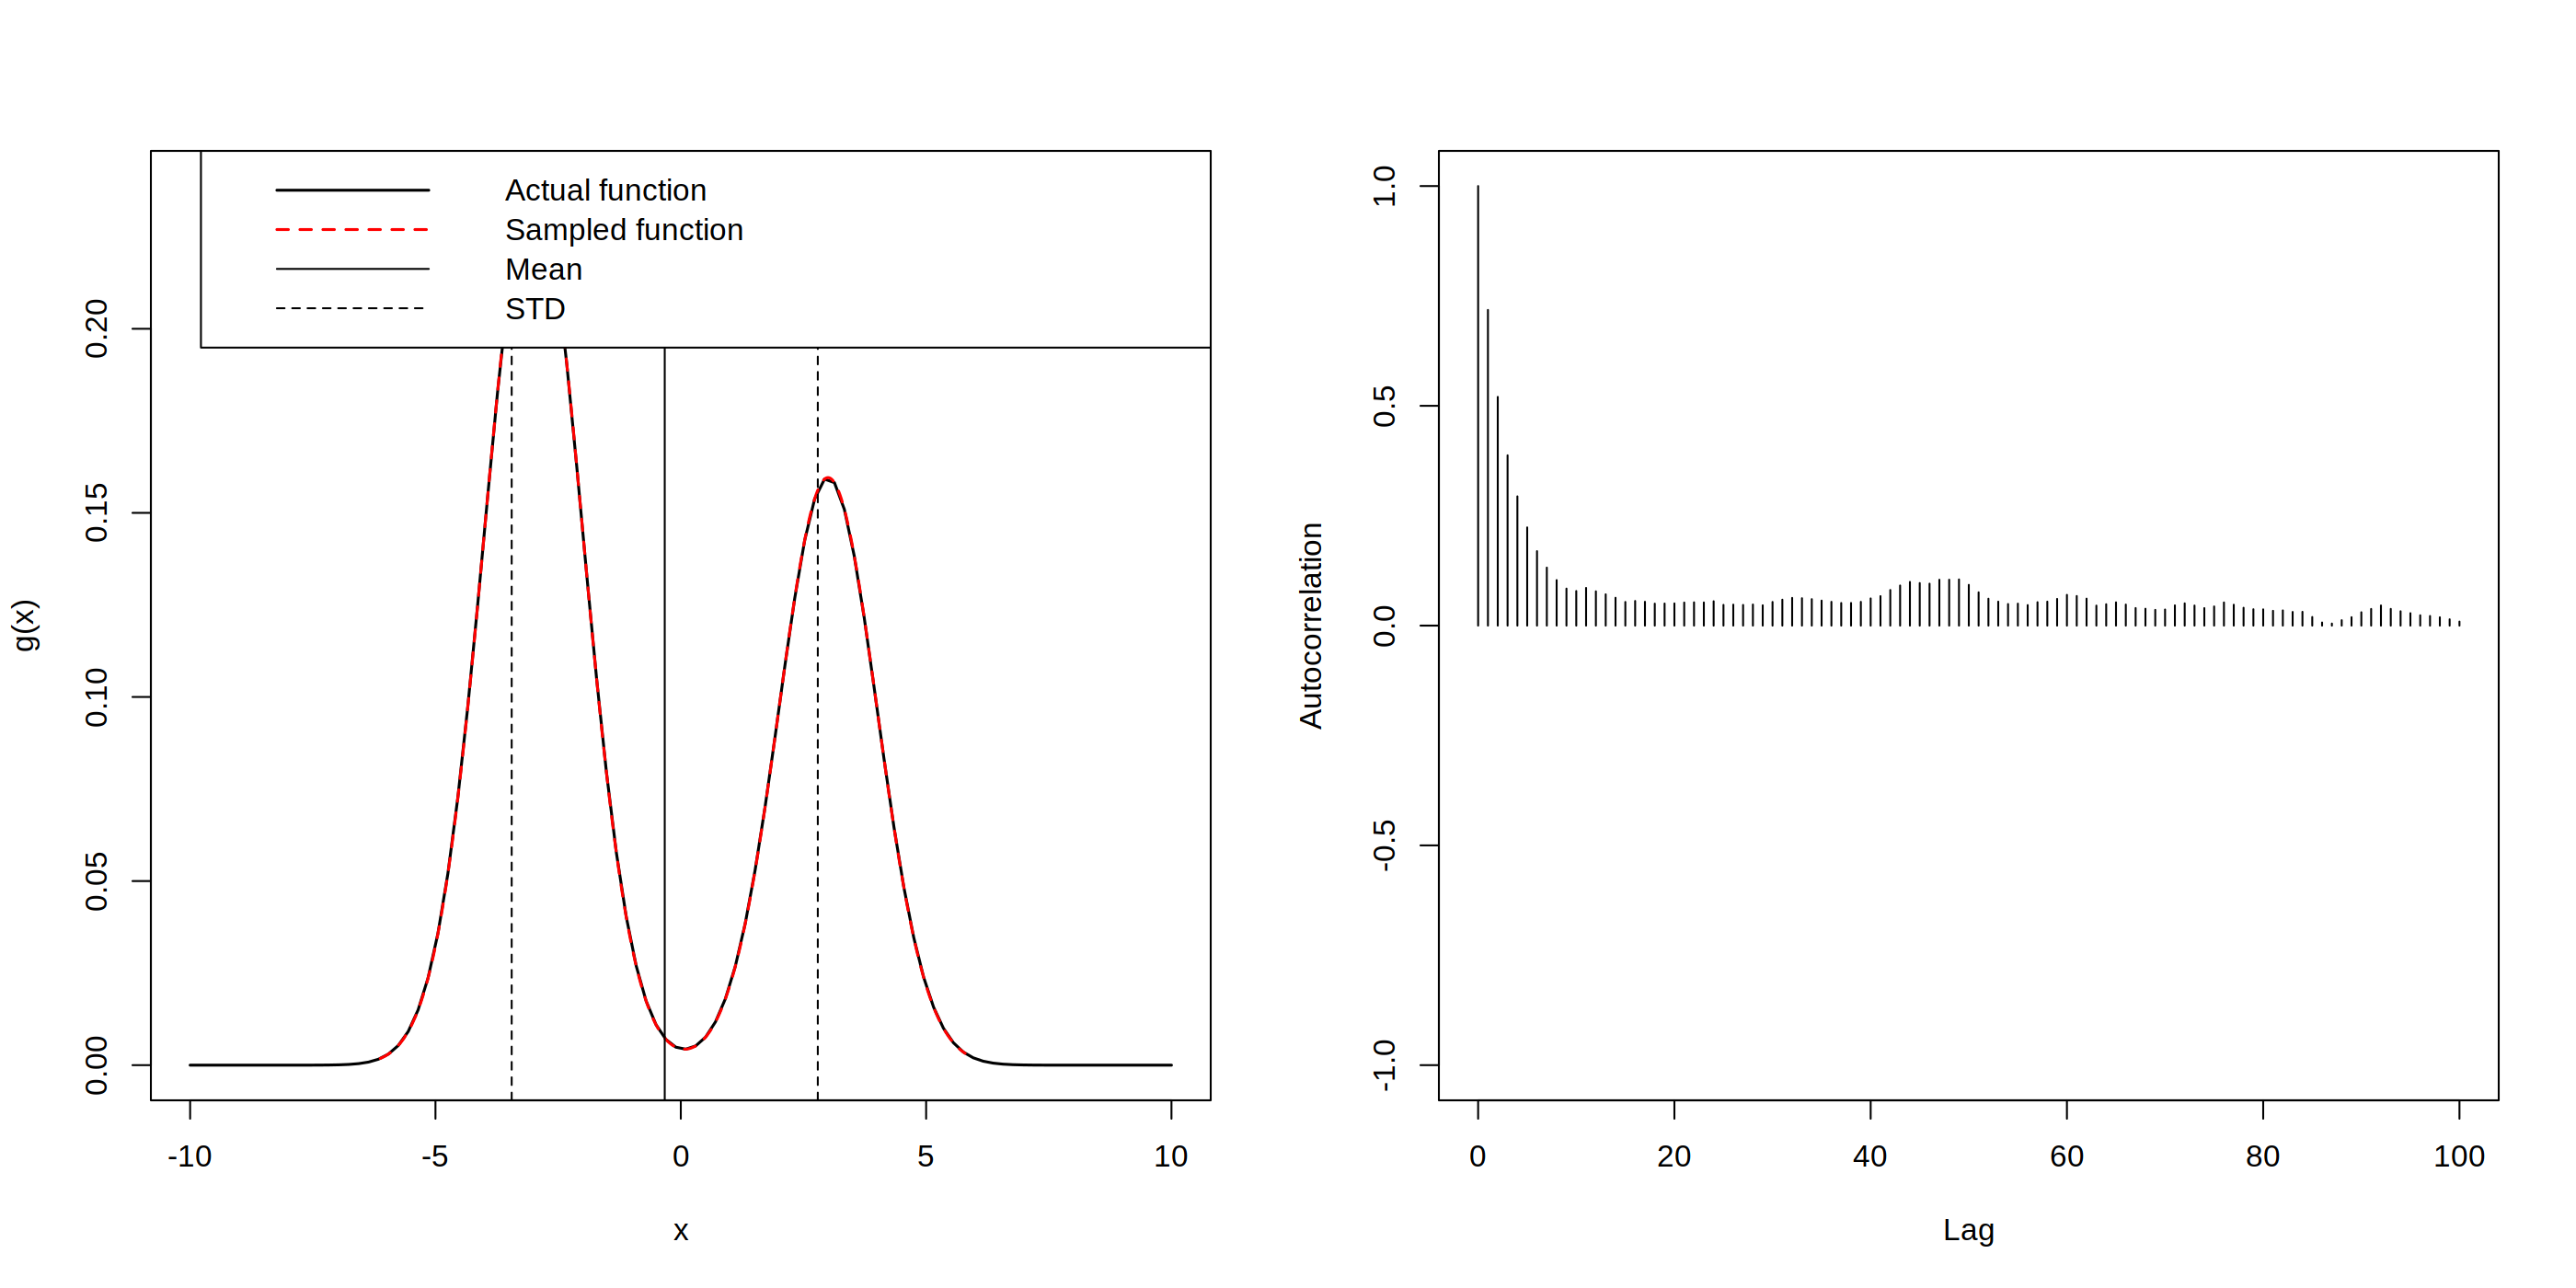


Burn-in: 9 
Thinning: 96 
Mean: -0.8554912 
Var: 9.800002

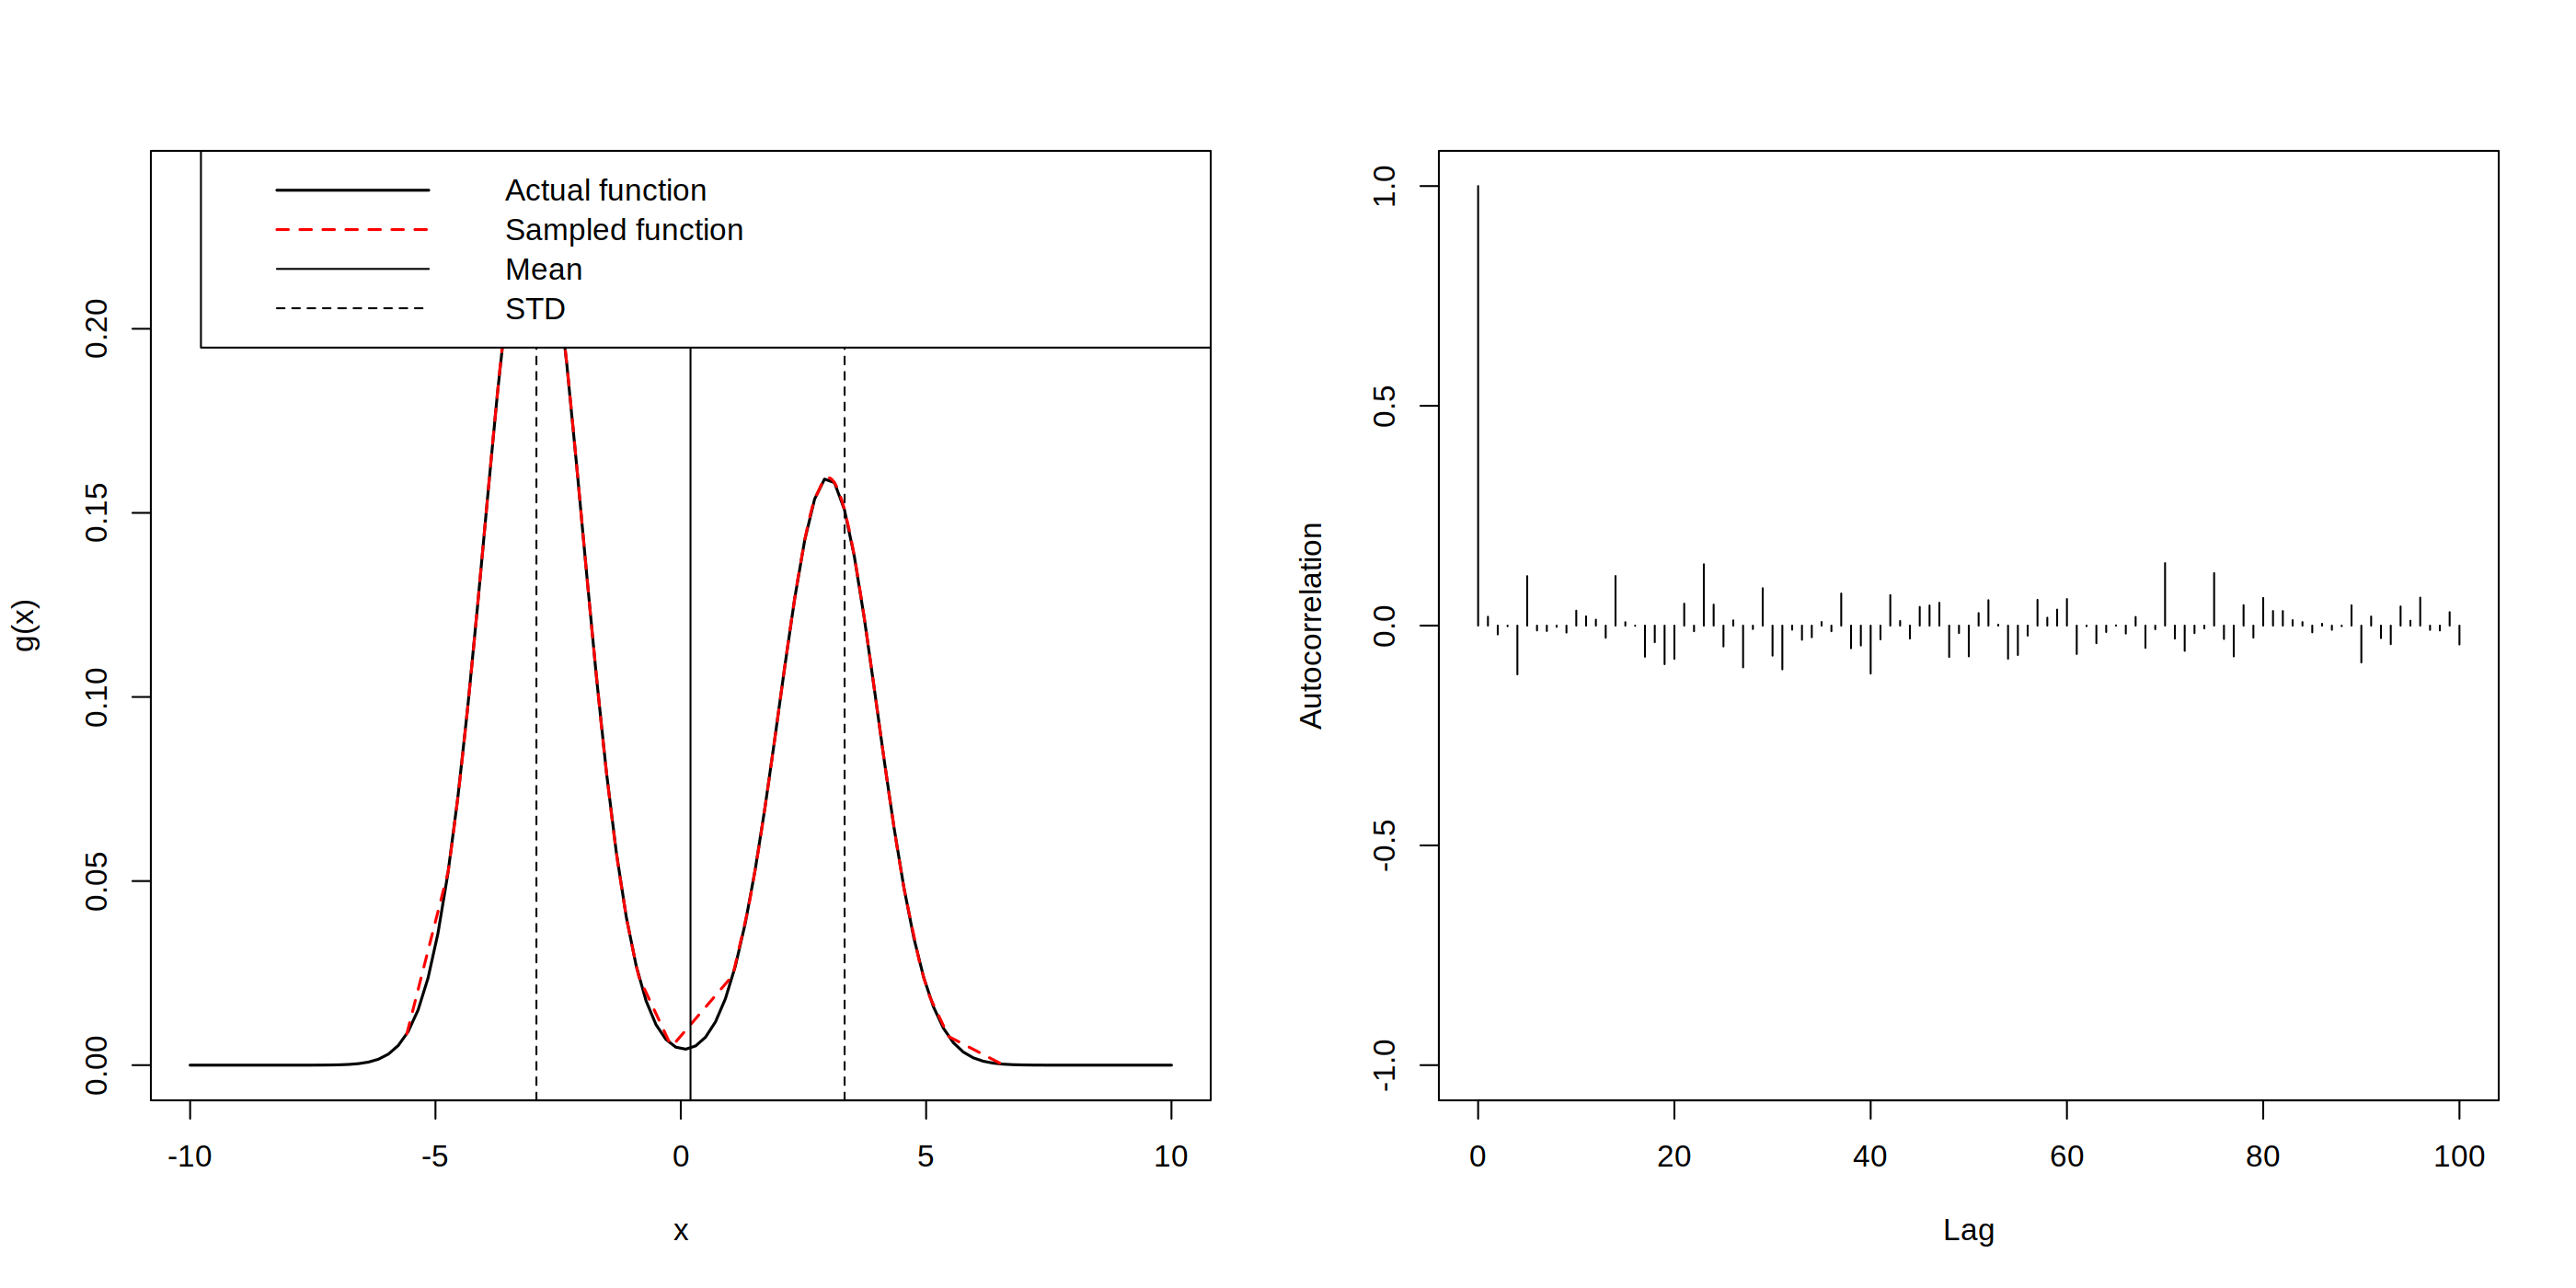


Burn-in: 49 
Thinning: 61 
Mean: -1.022045 
Var: 9.432218

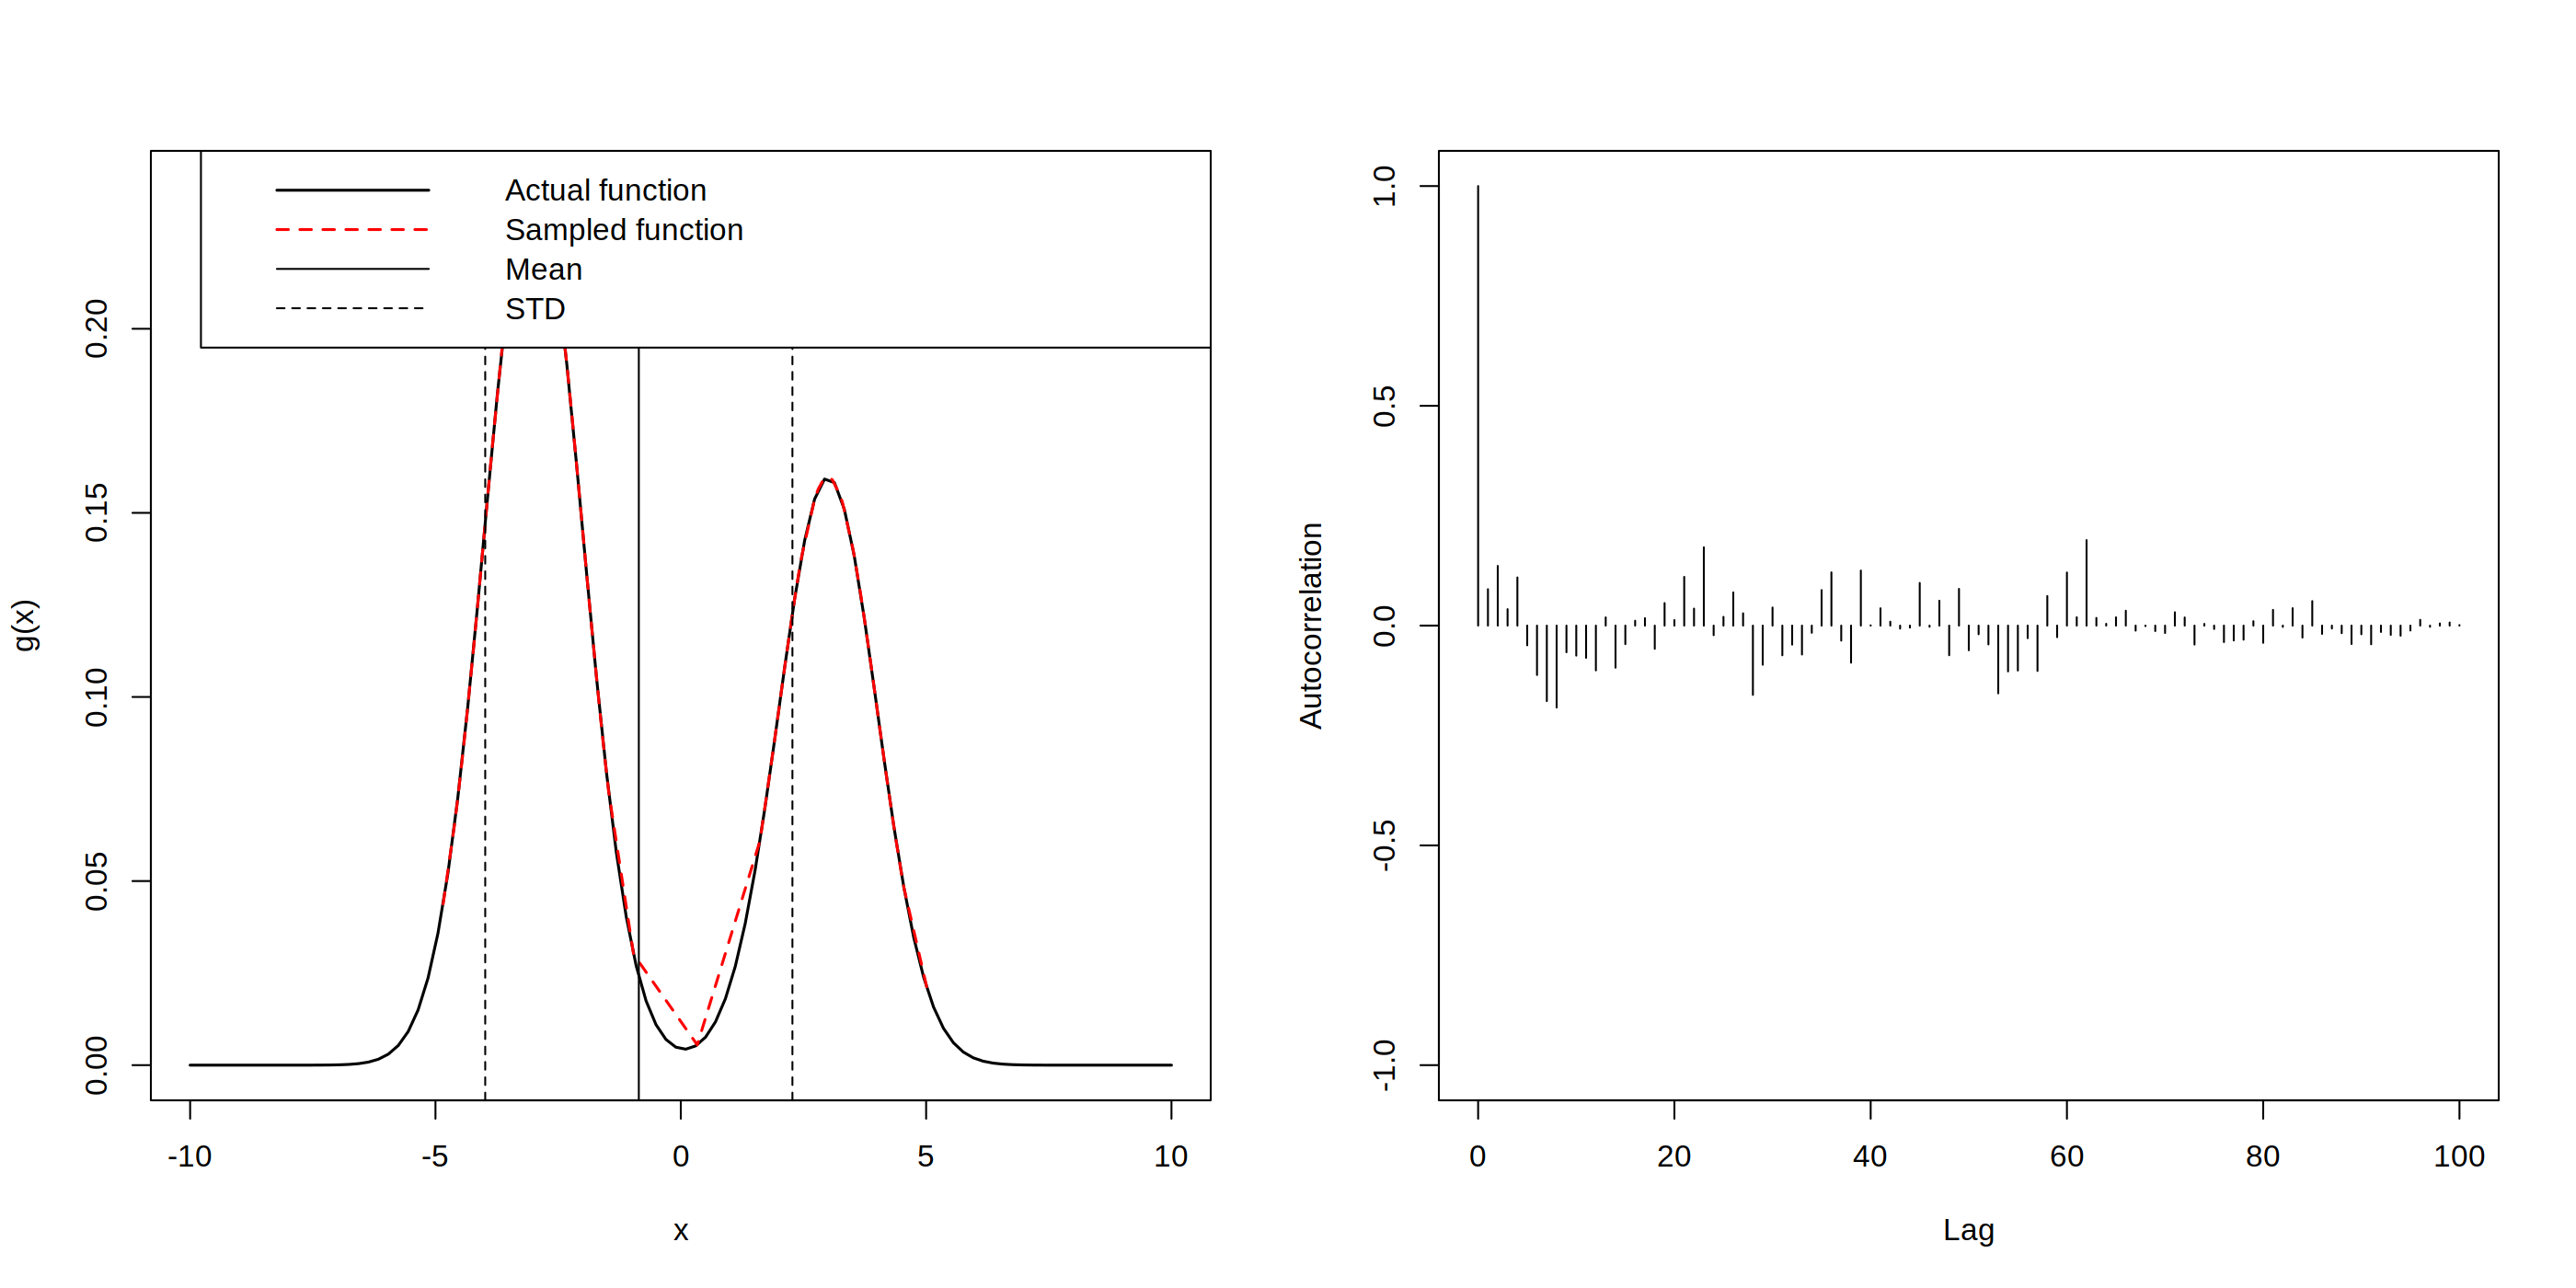


Burn-in: 18 
Thinning: 81 
Mean: -0.5890561 
Var: 9.412892

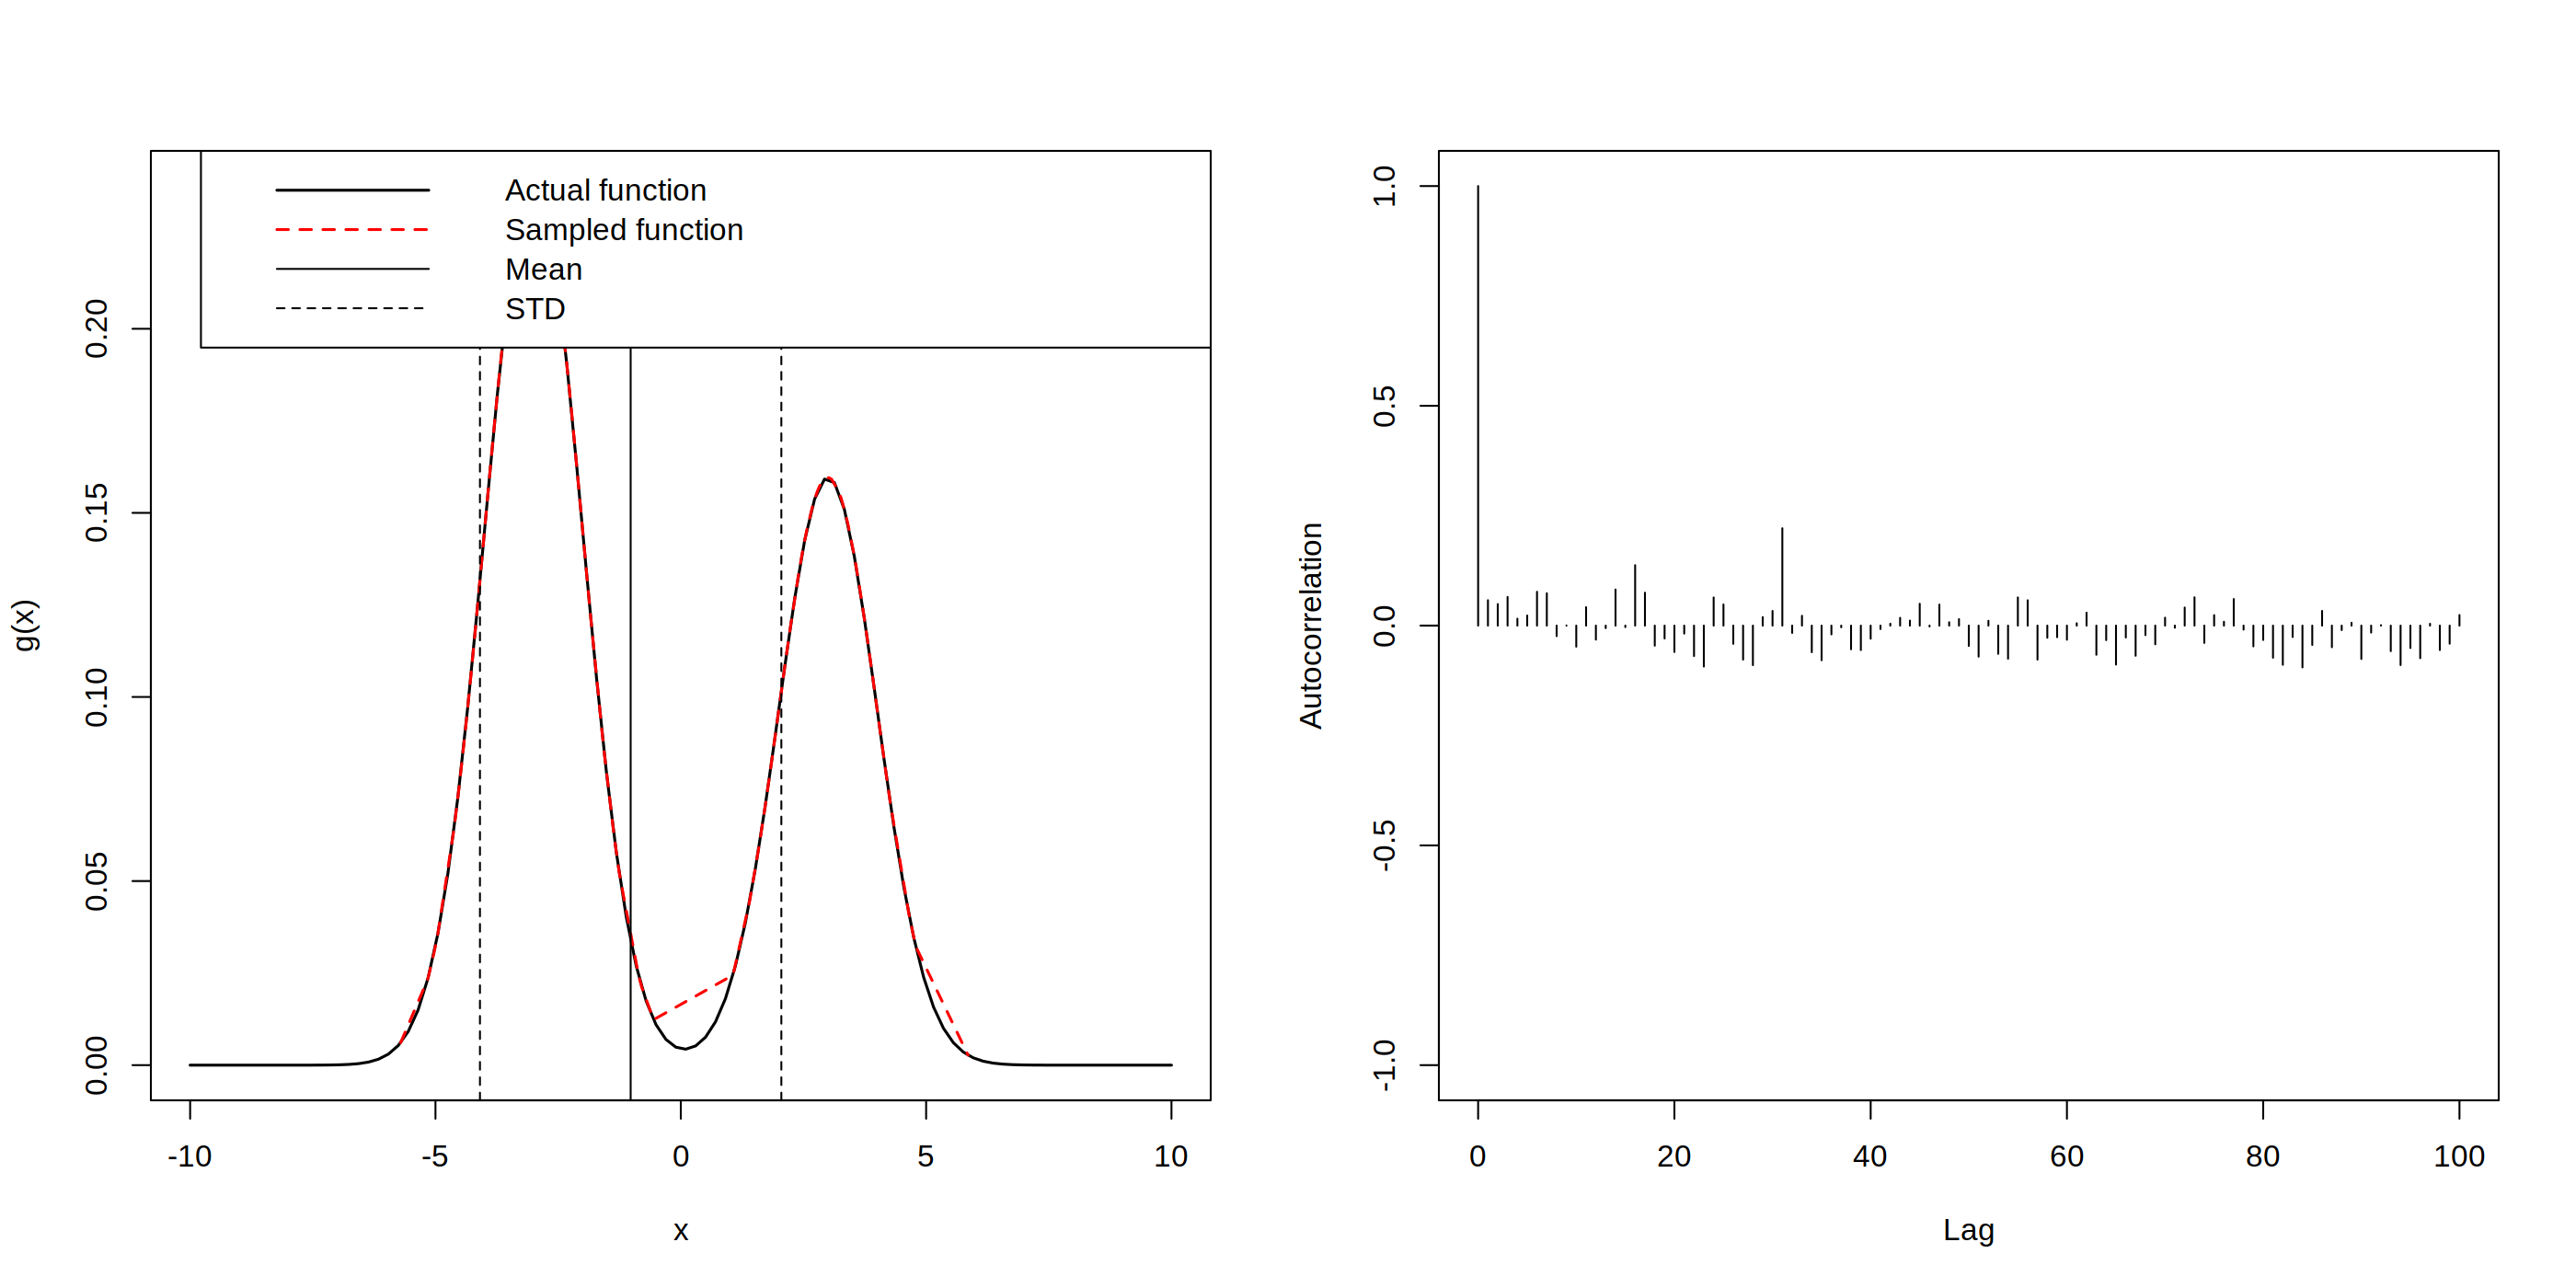


Burn-in: 32 
Thinning: 6 
Mean: -0.7553167 
Var: 9.403707

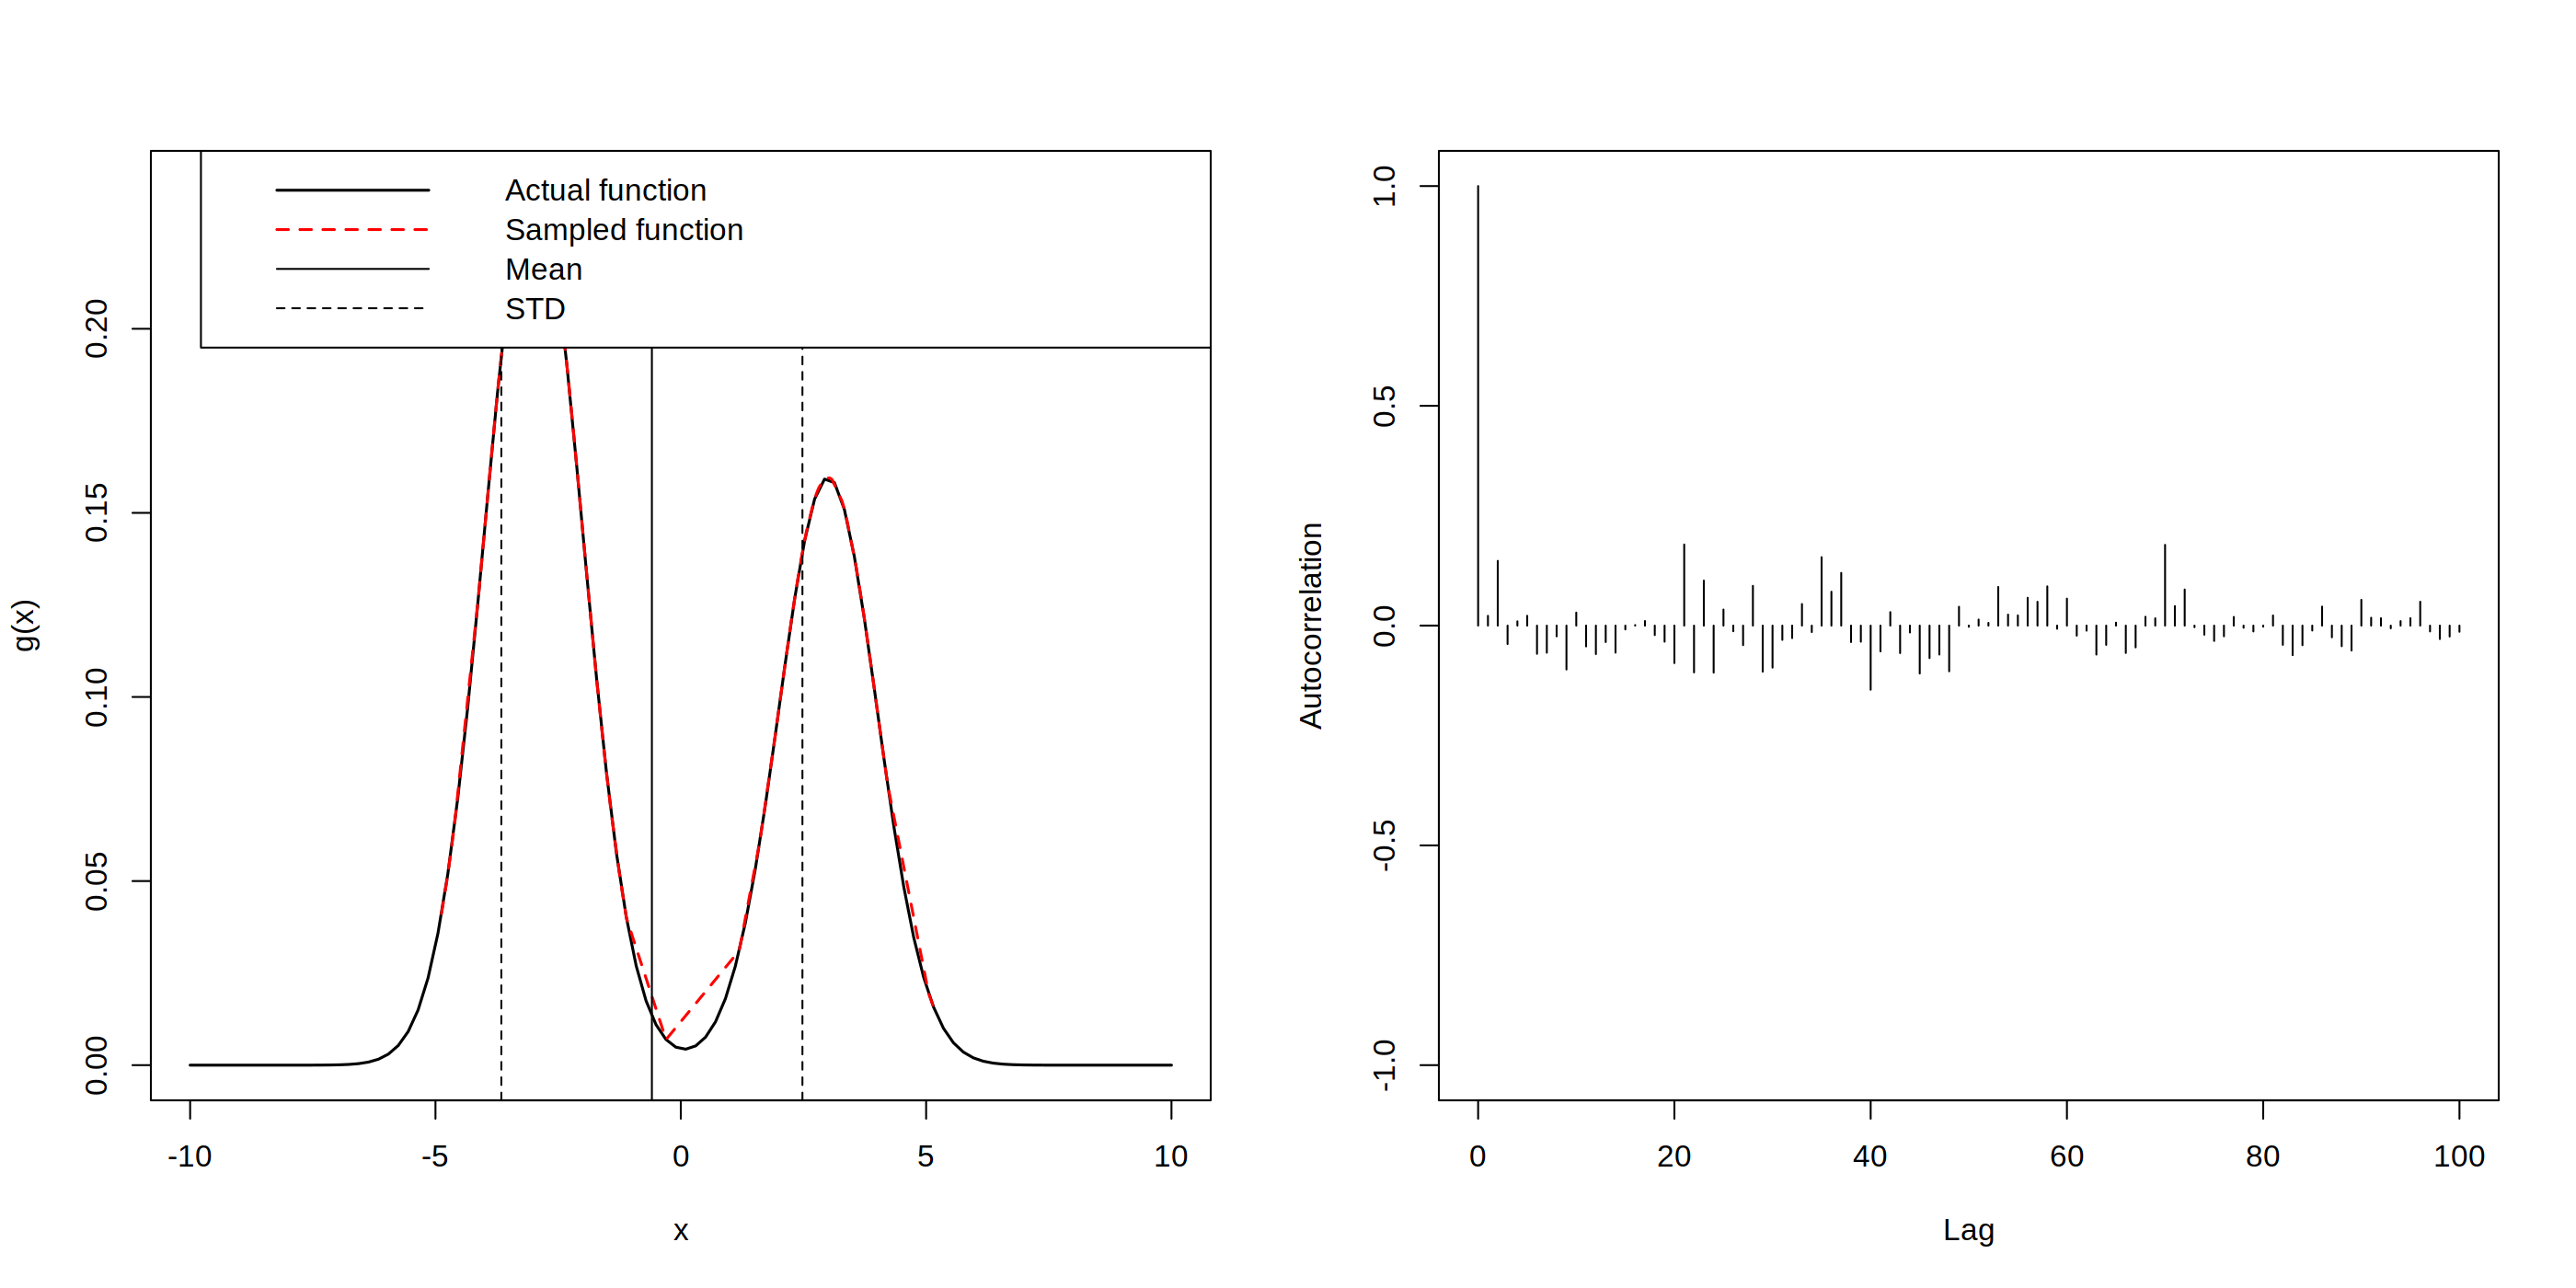


Burn-in: 5 
Thinning: 50 
Mean: -1.033158 
Var: 8.76846

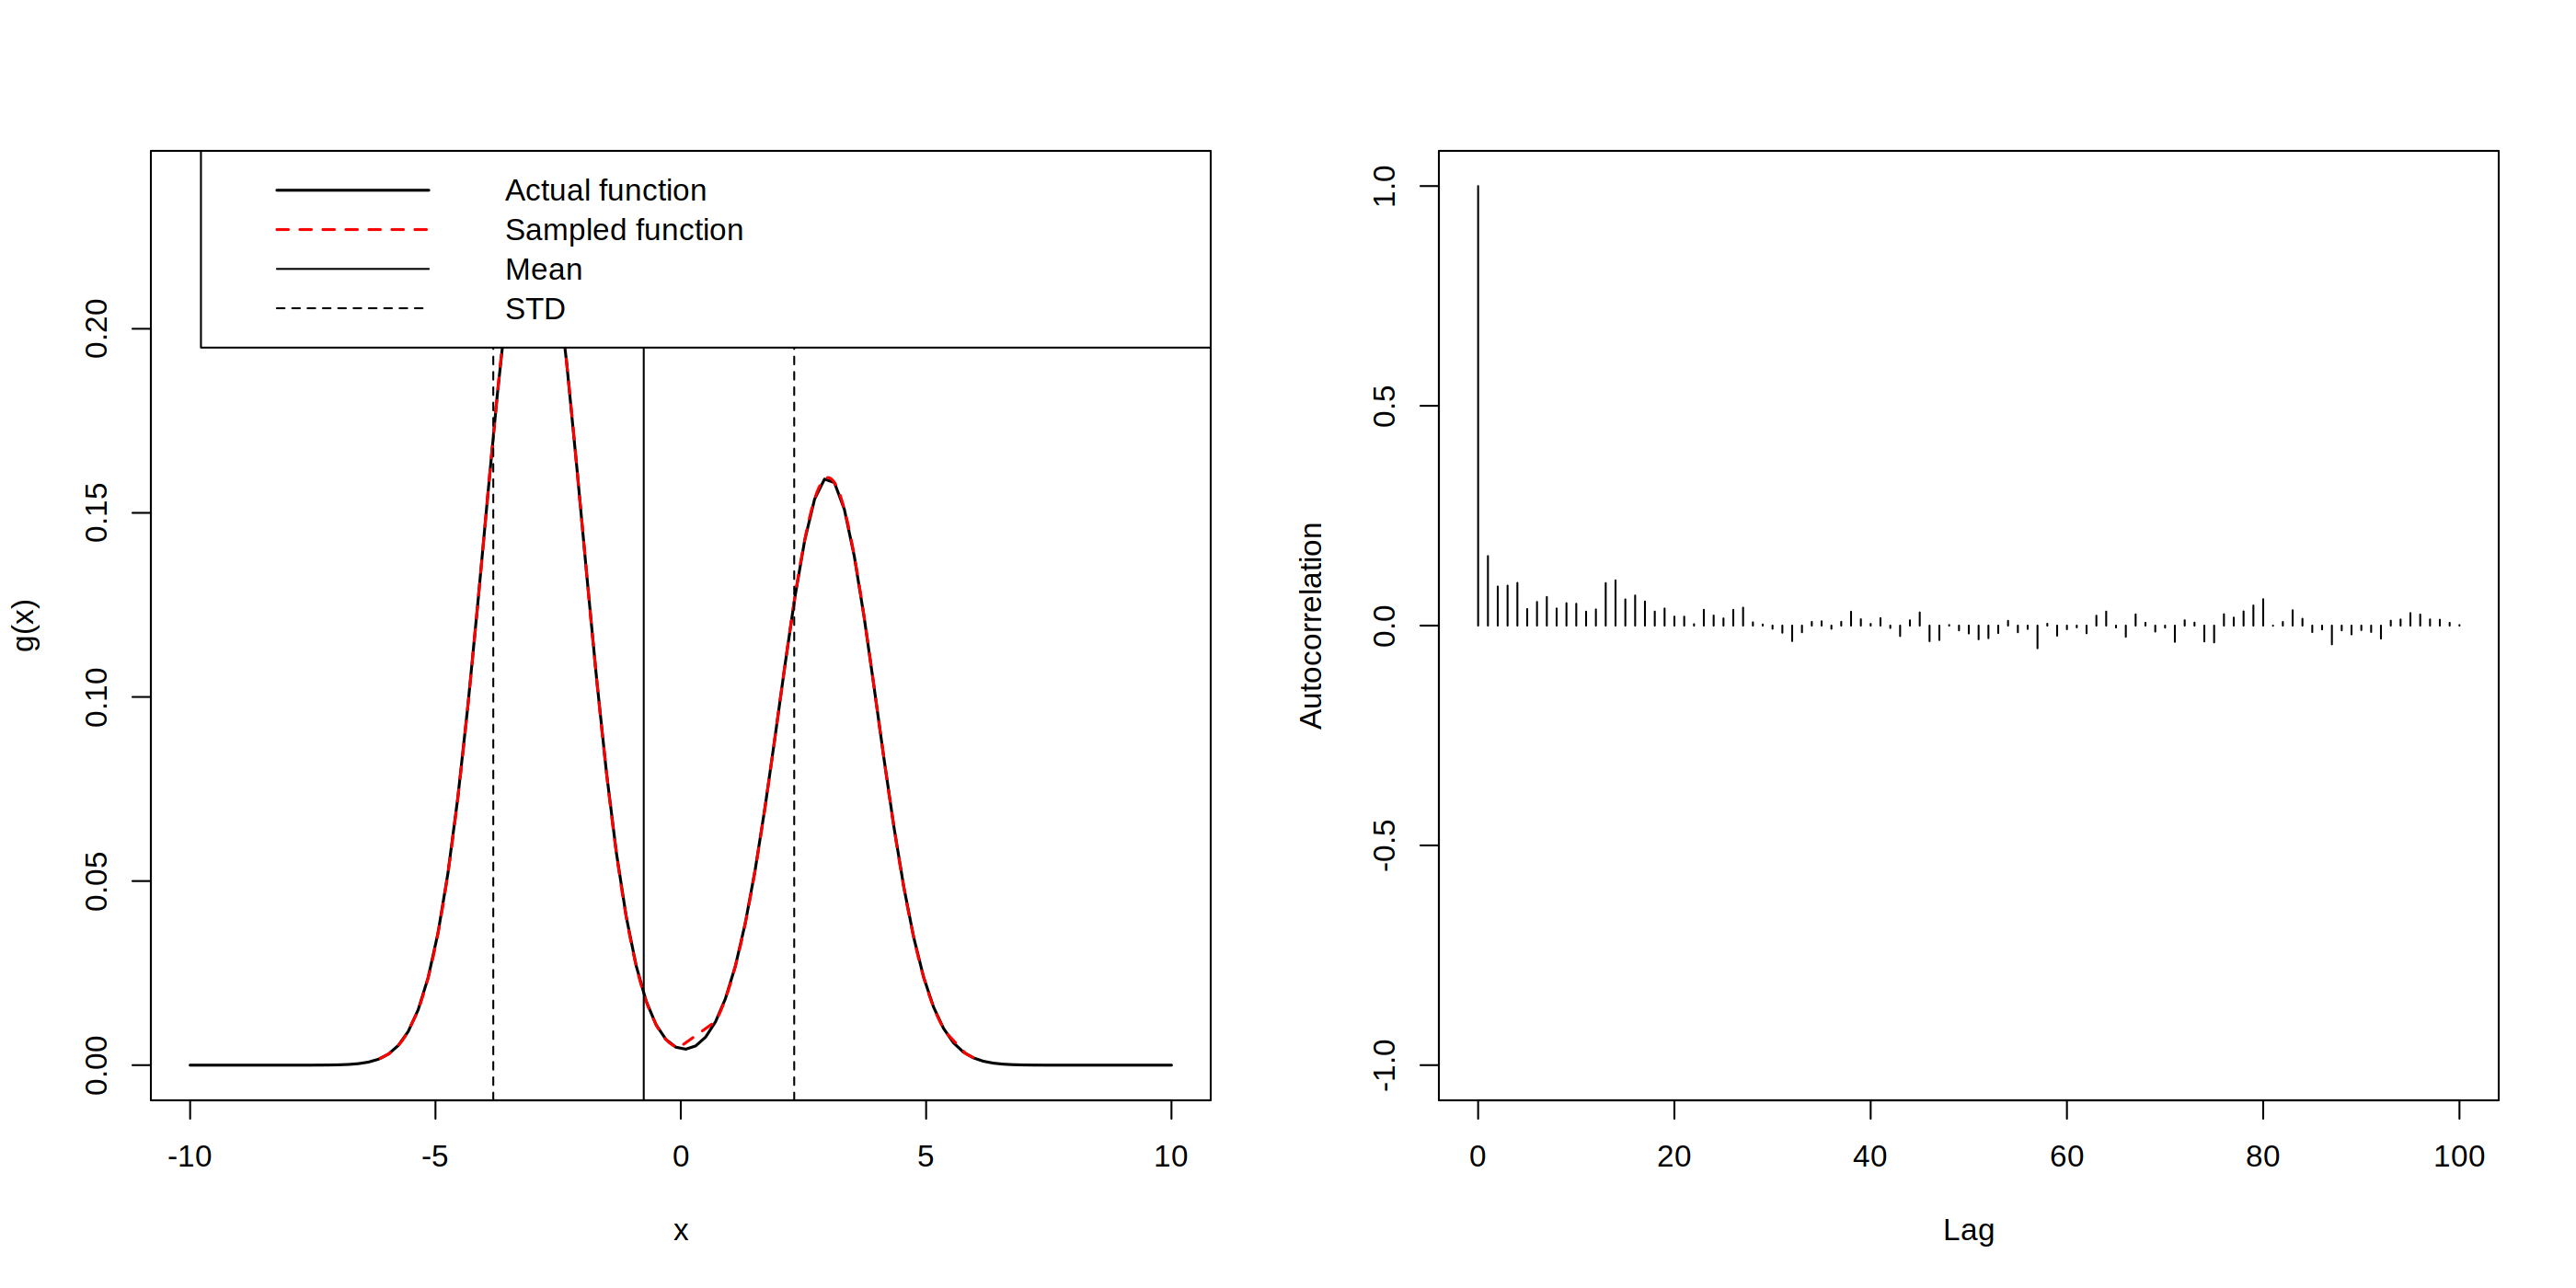


Burn-in: 39 
Thinning: 3 
Mean: -0.4913546 
Var: 9.909033

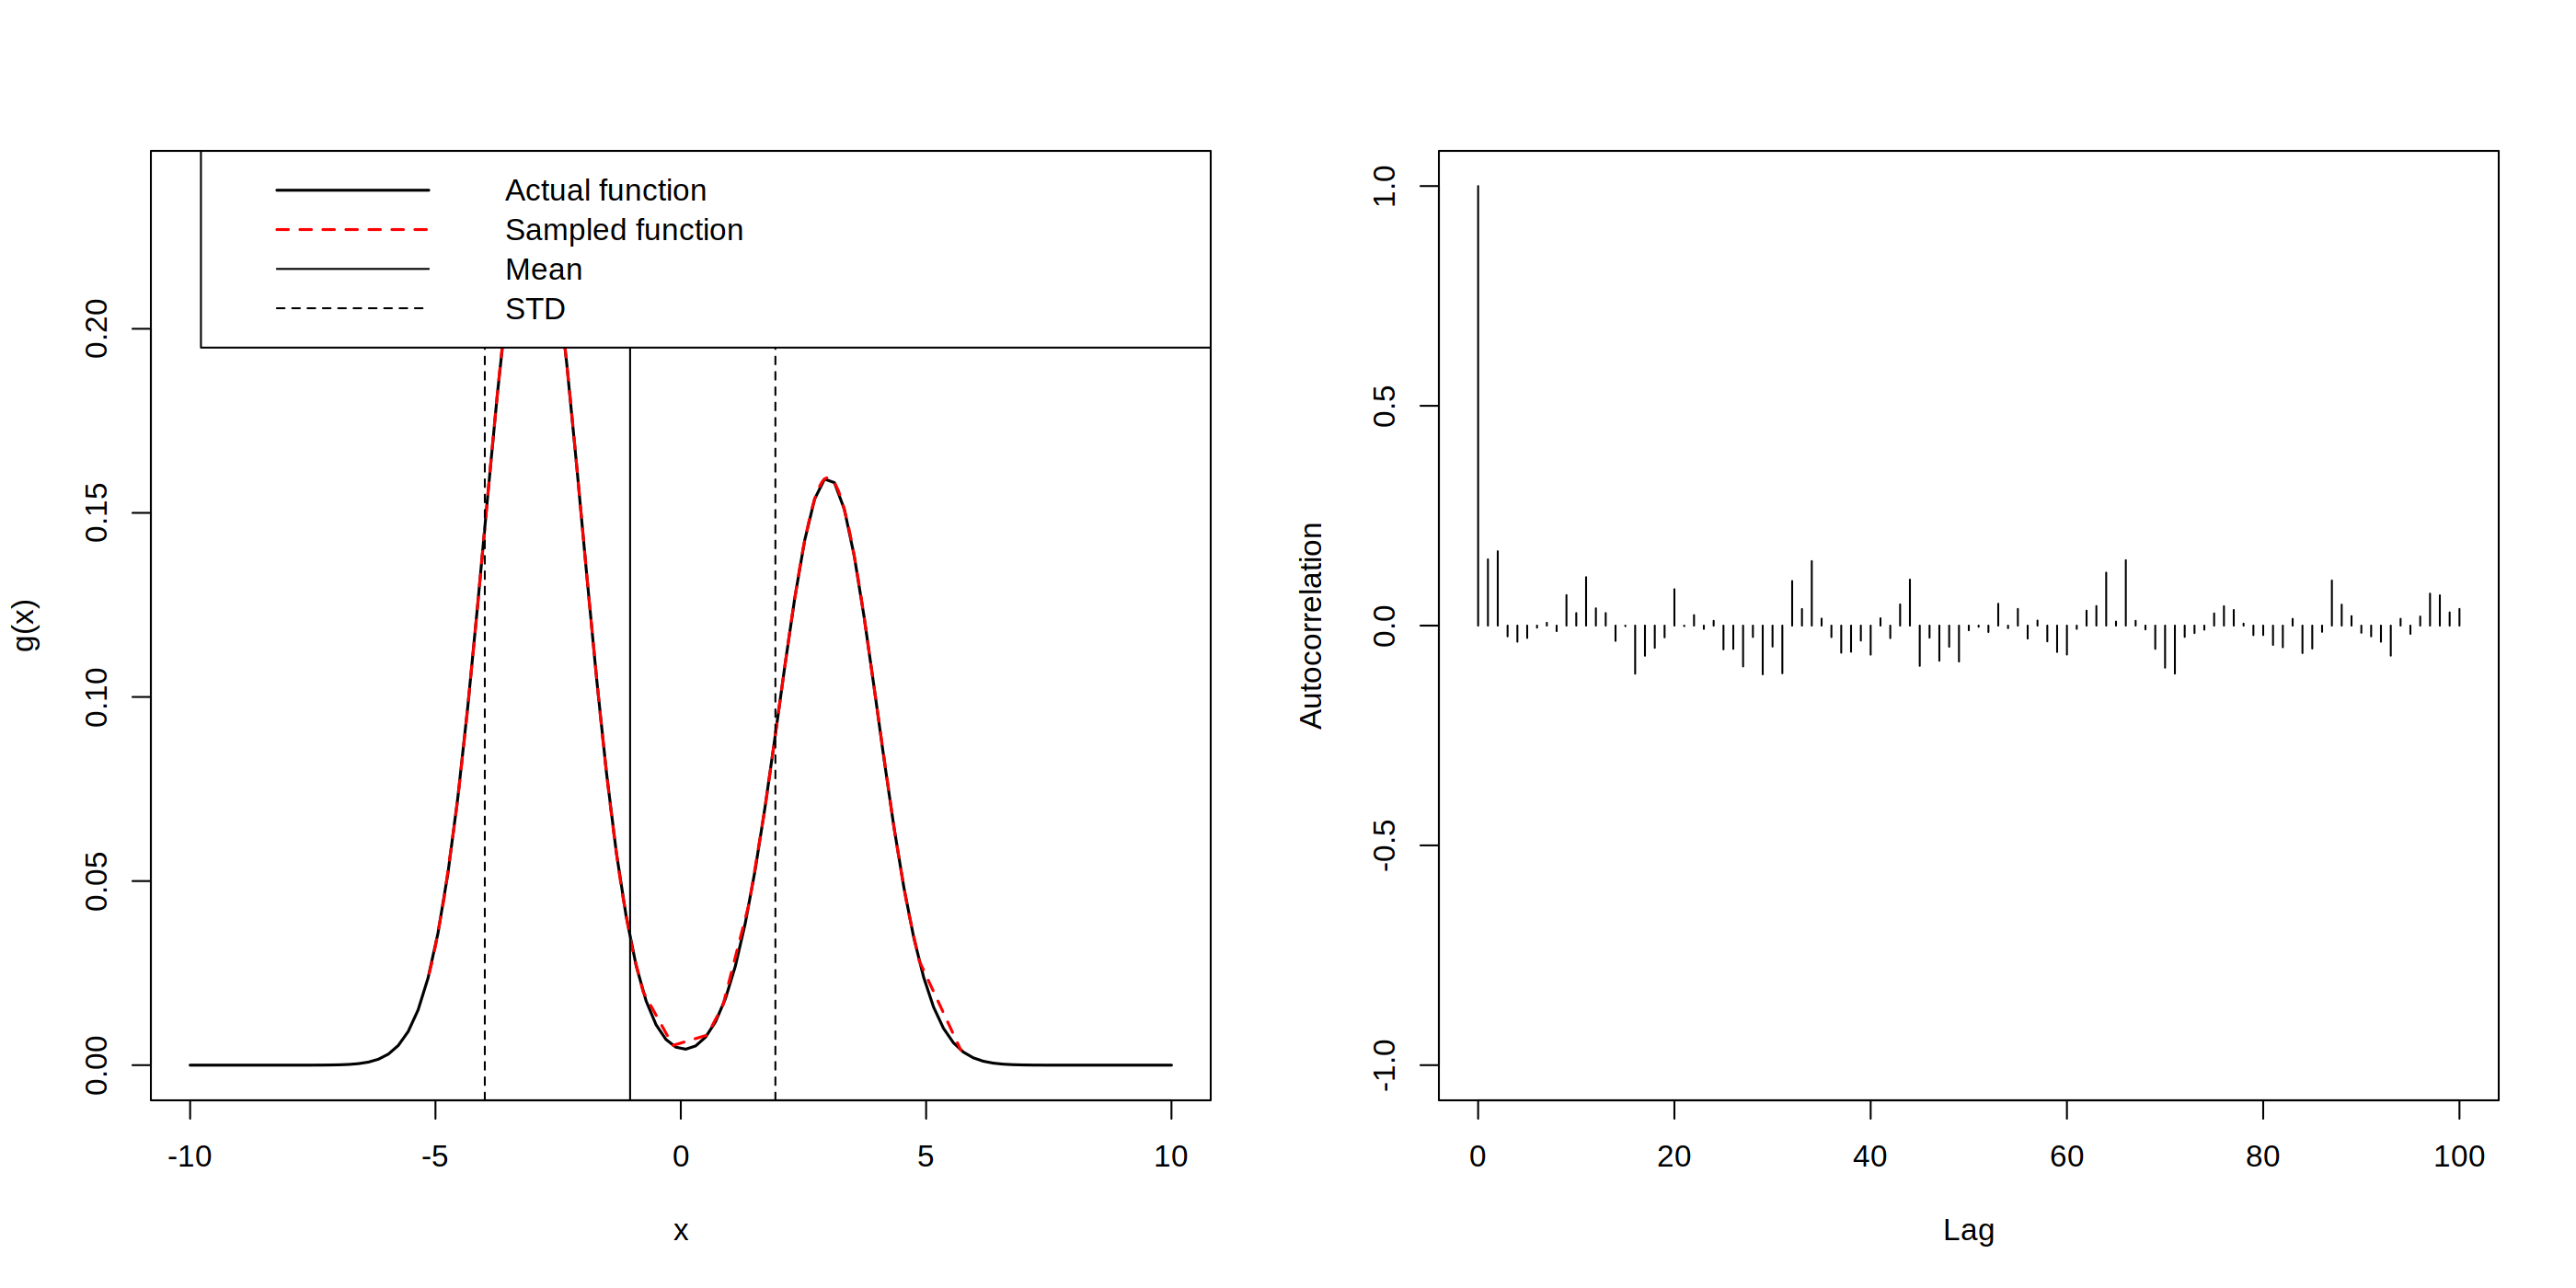


Burn-in: 25 
Thinning: 78 
Mean: -1.032888 
Var: 8.65509

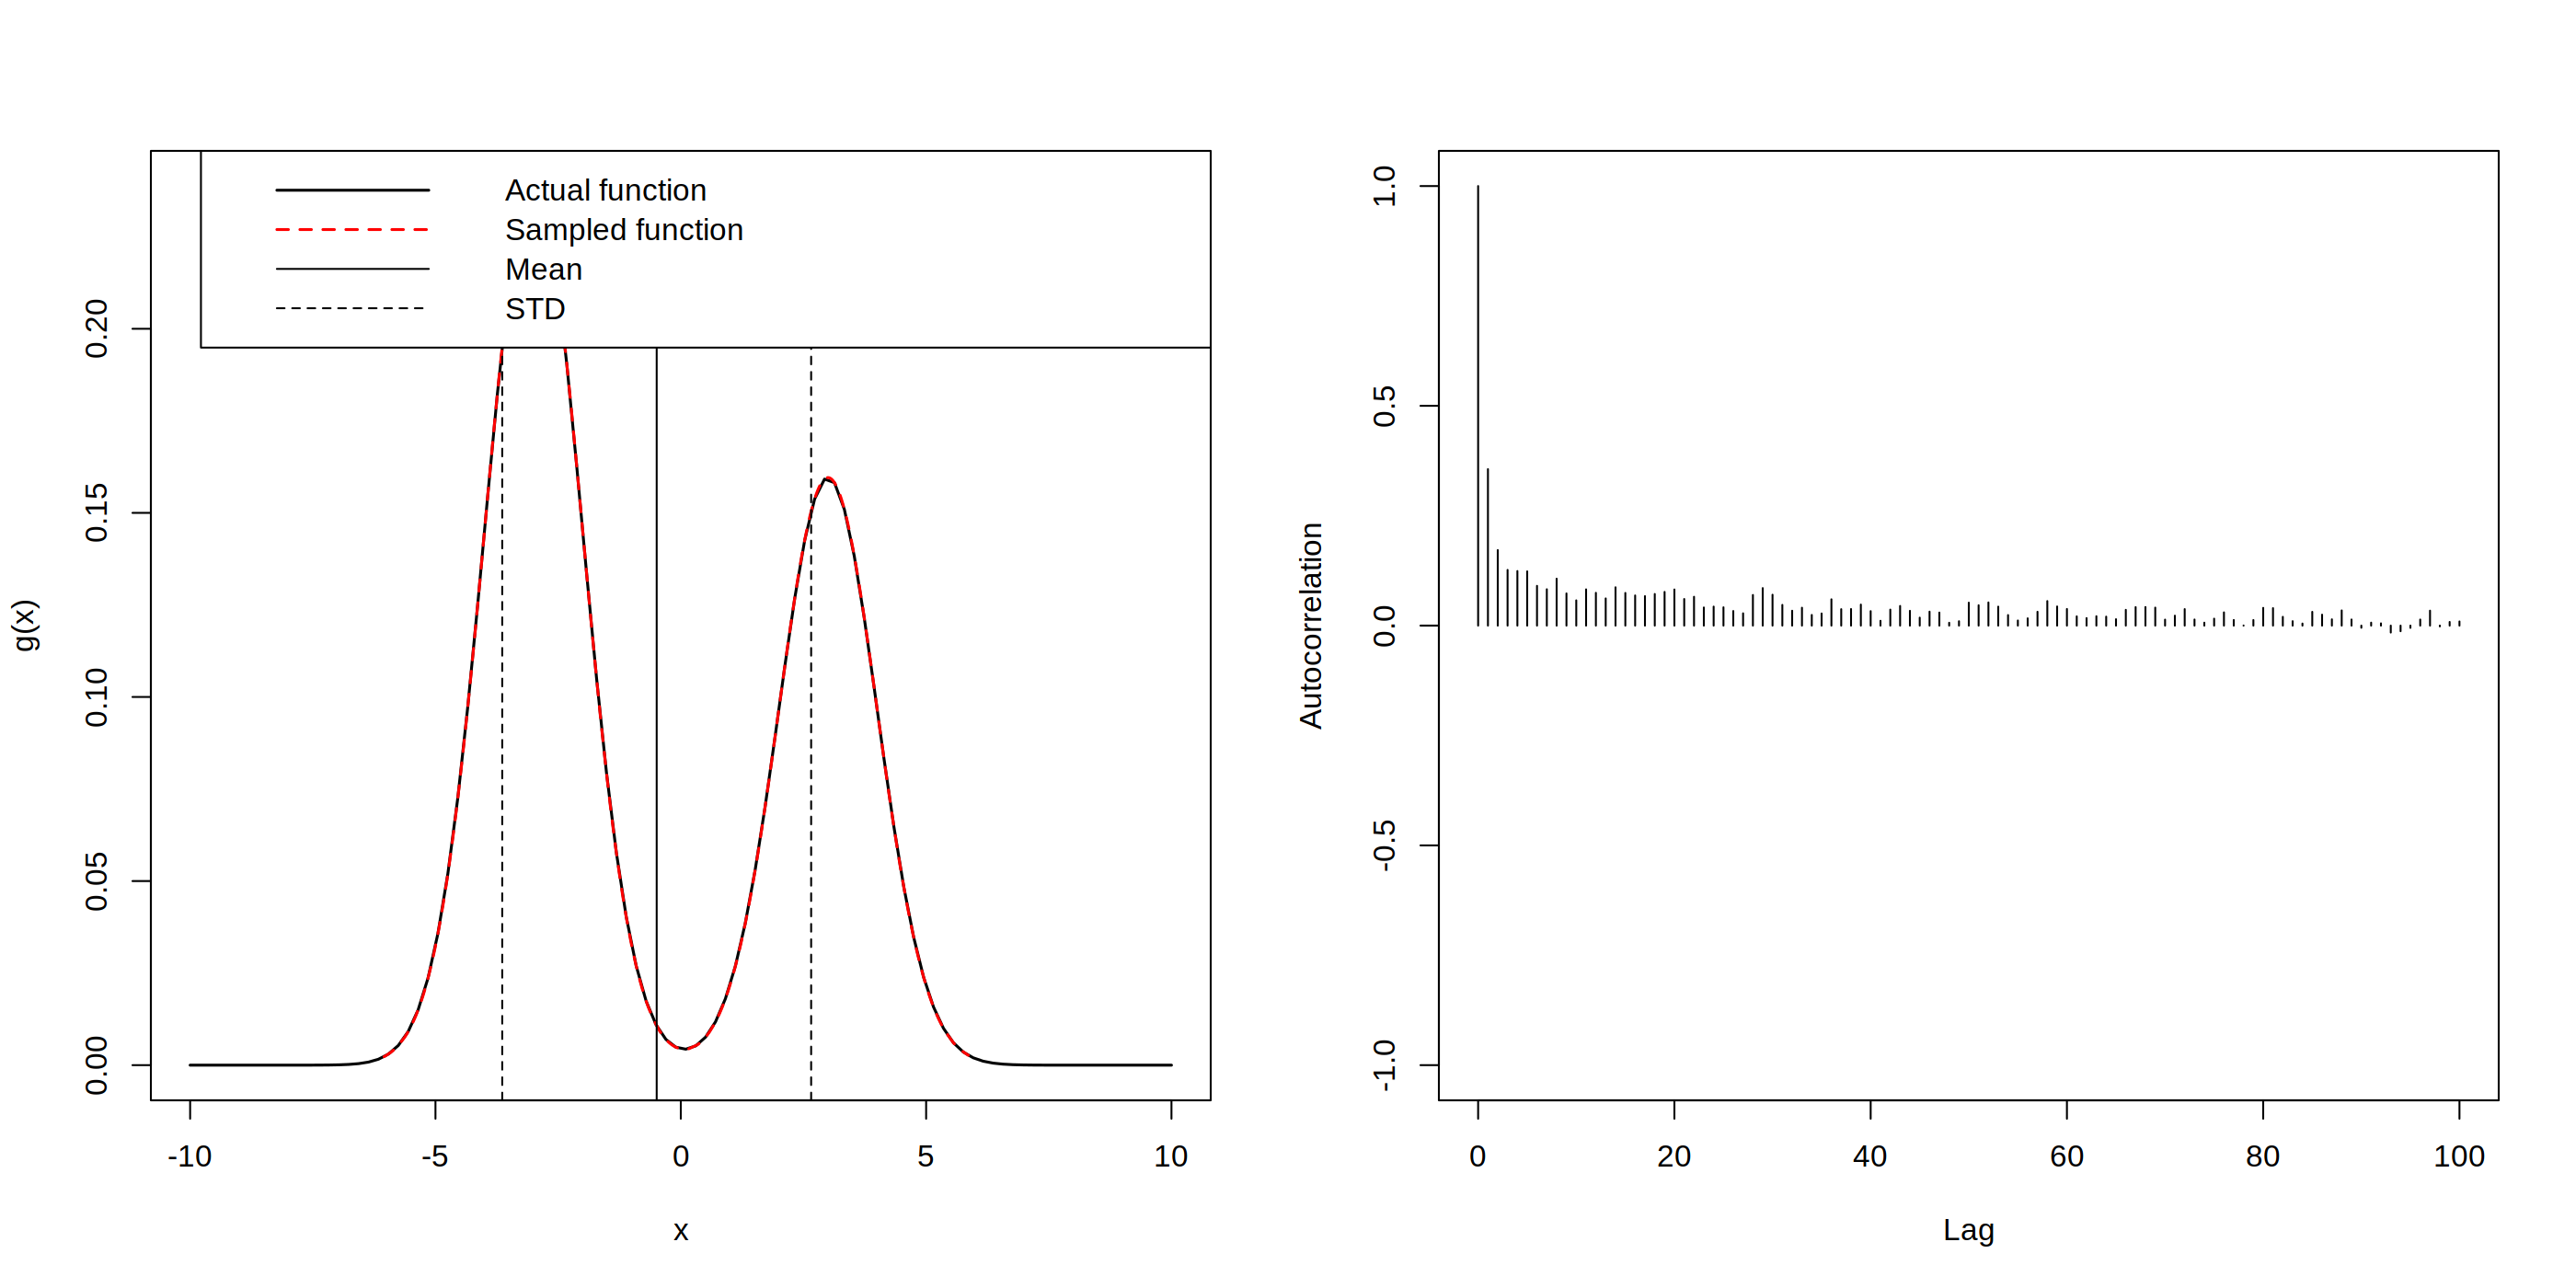


Burn-in: 23 
Thinning: 22 
Mean: 0.3571061 
Var: 9.687437

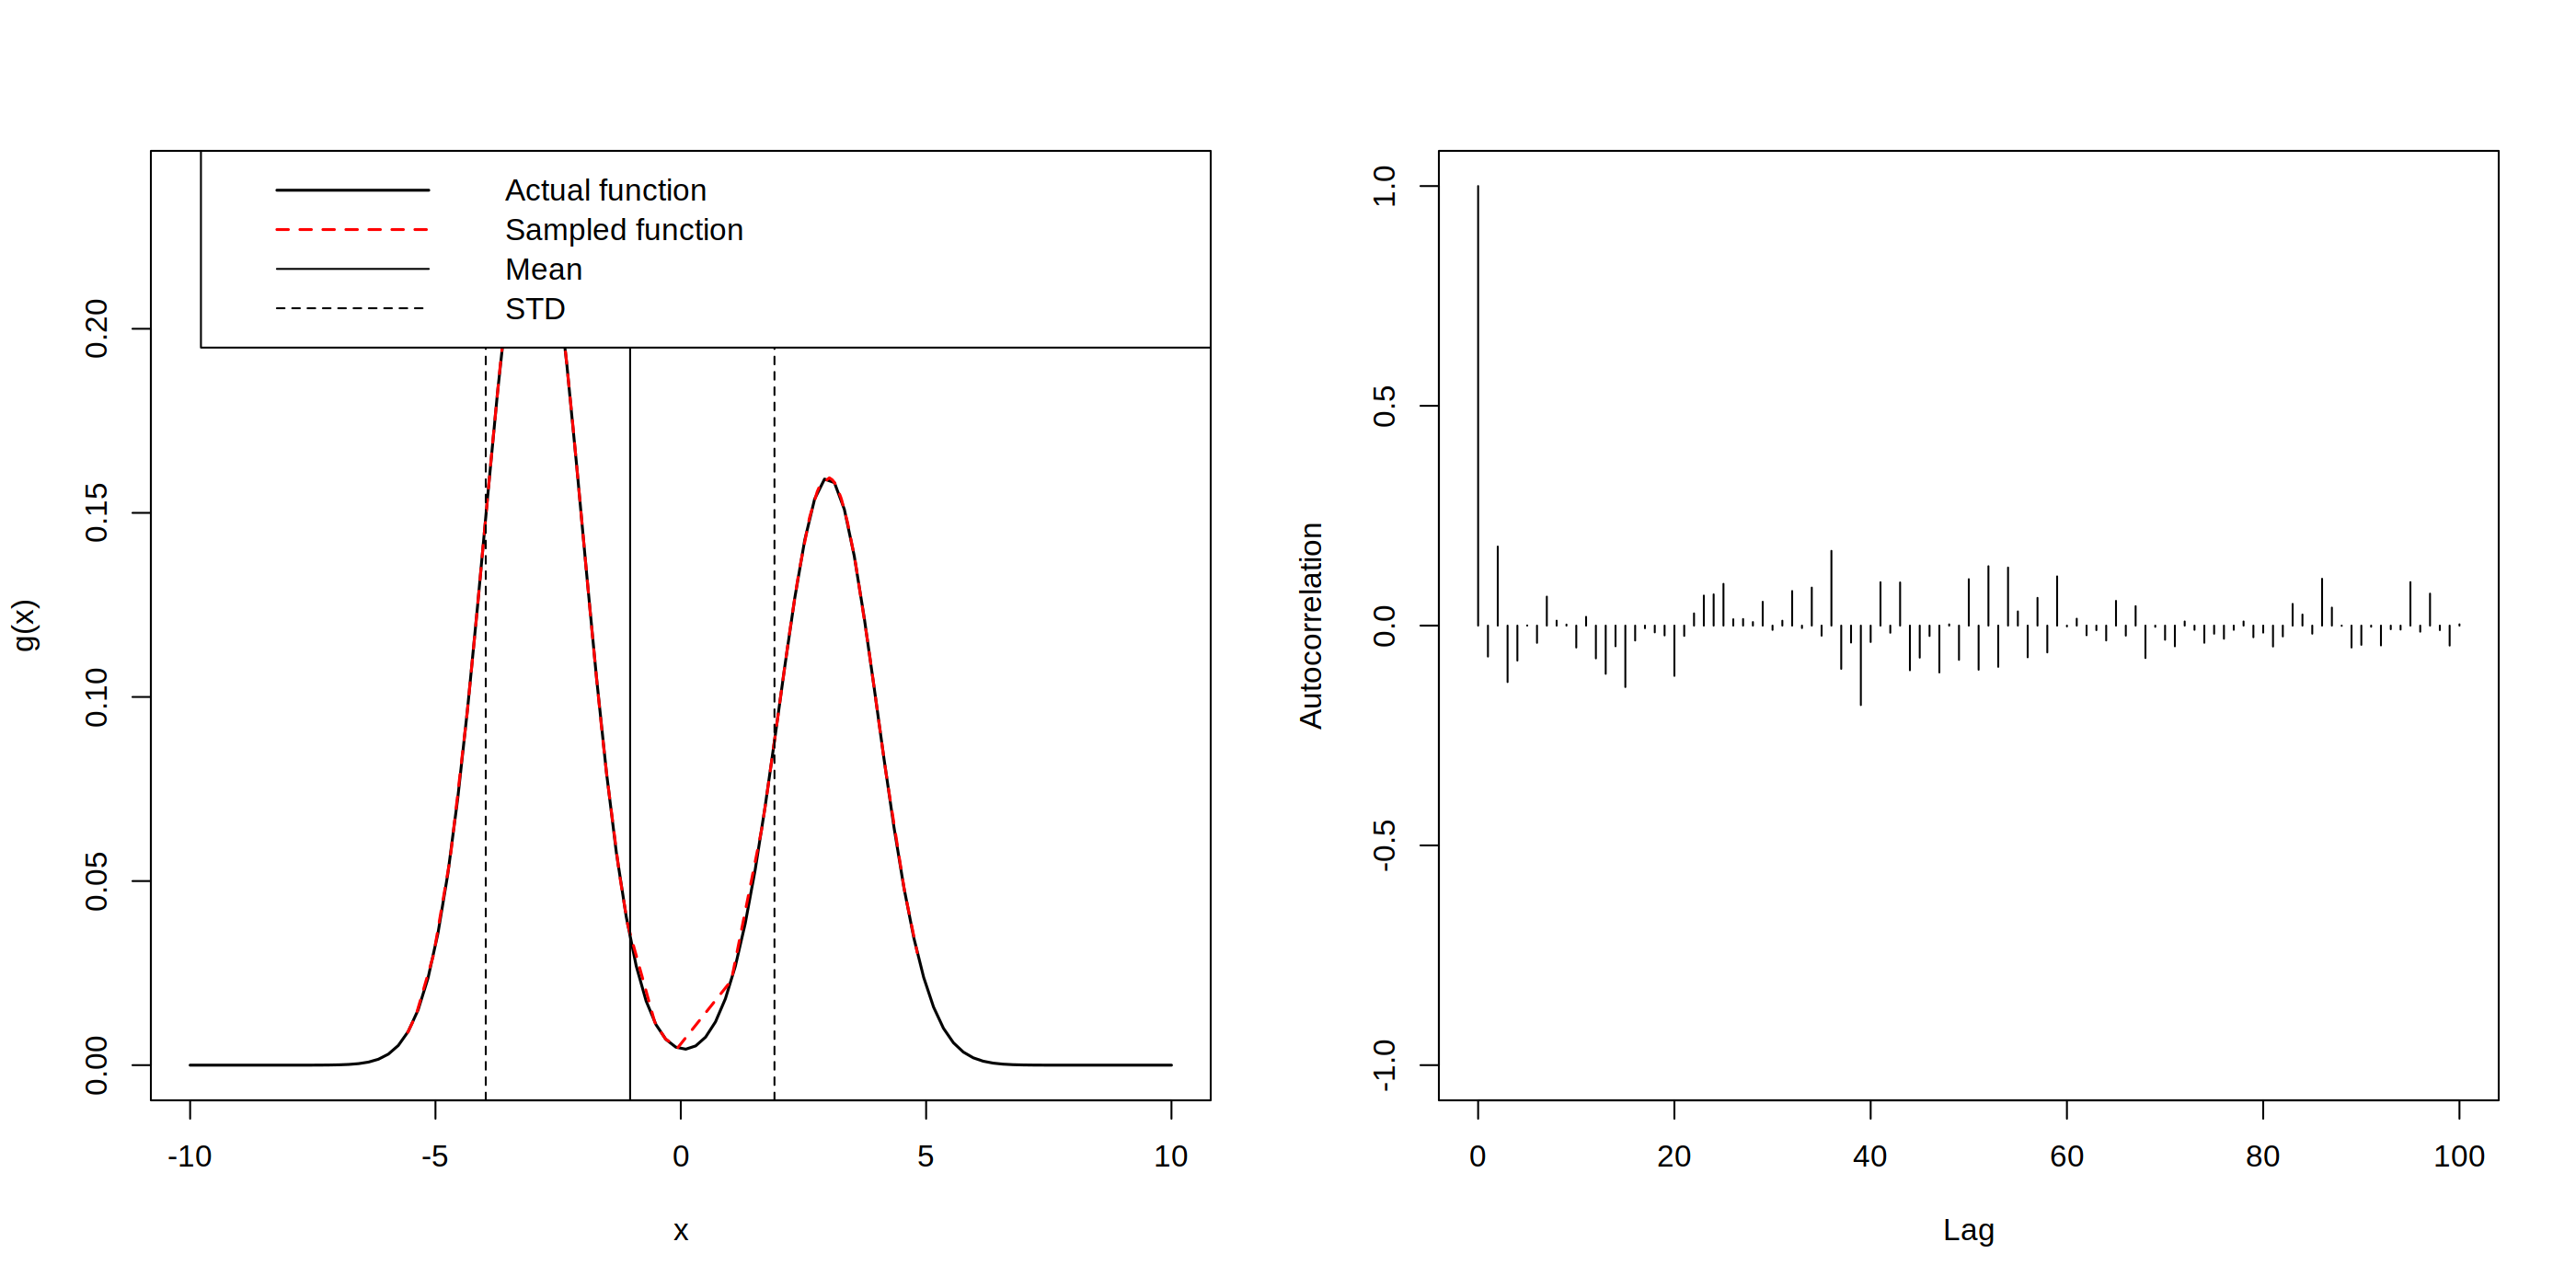


Burn-in: 65 
Thinning: 23 
Mean: -0.8088873 
Var: 9.002115

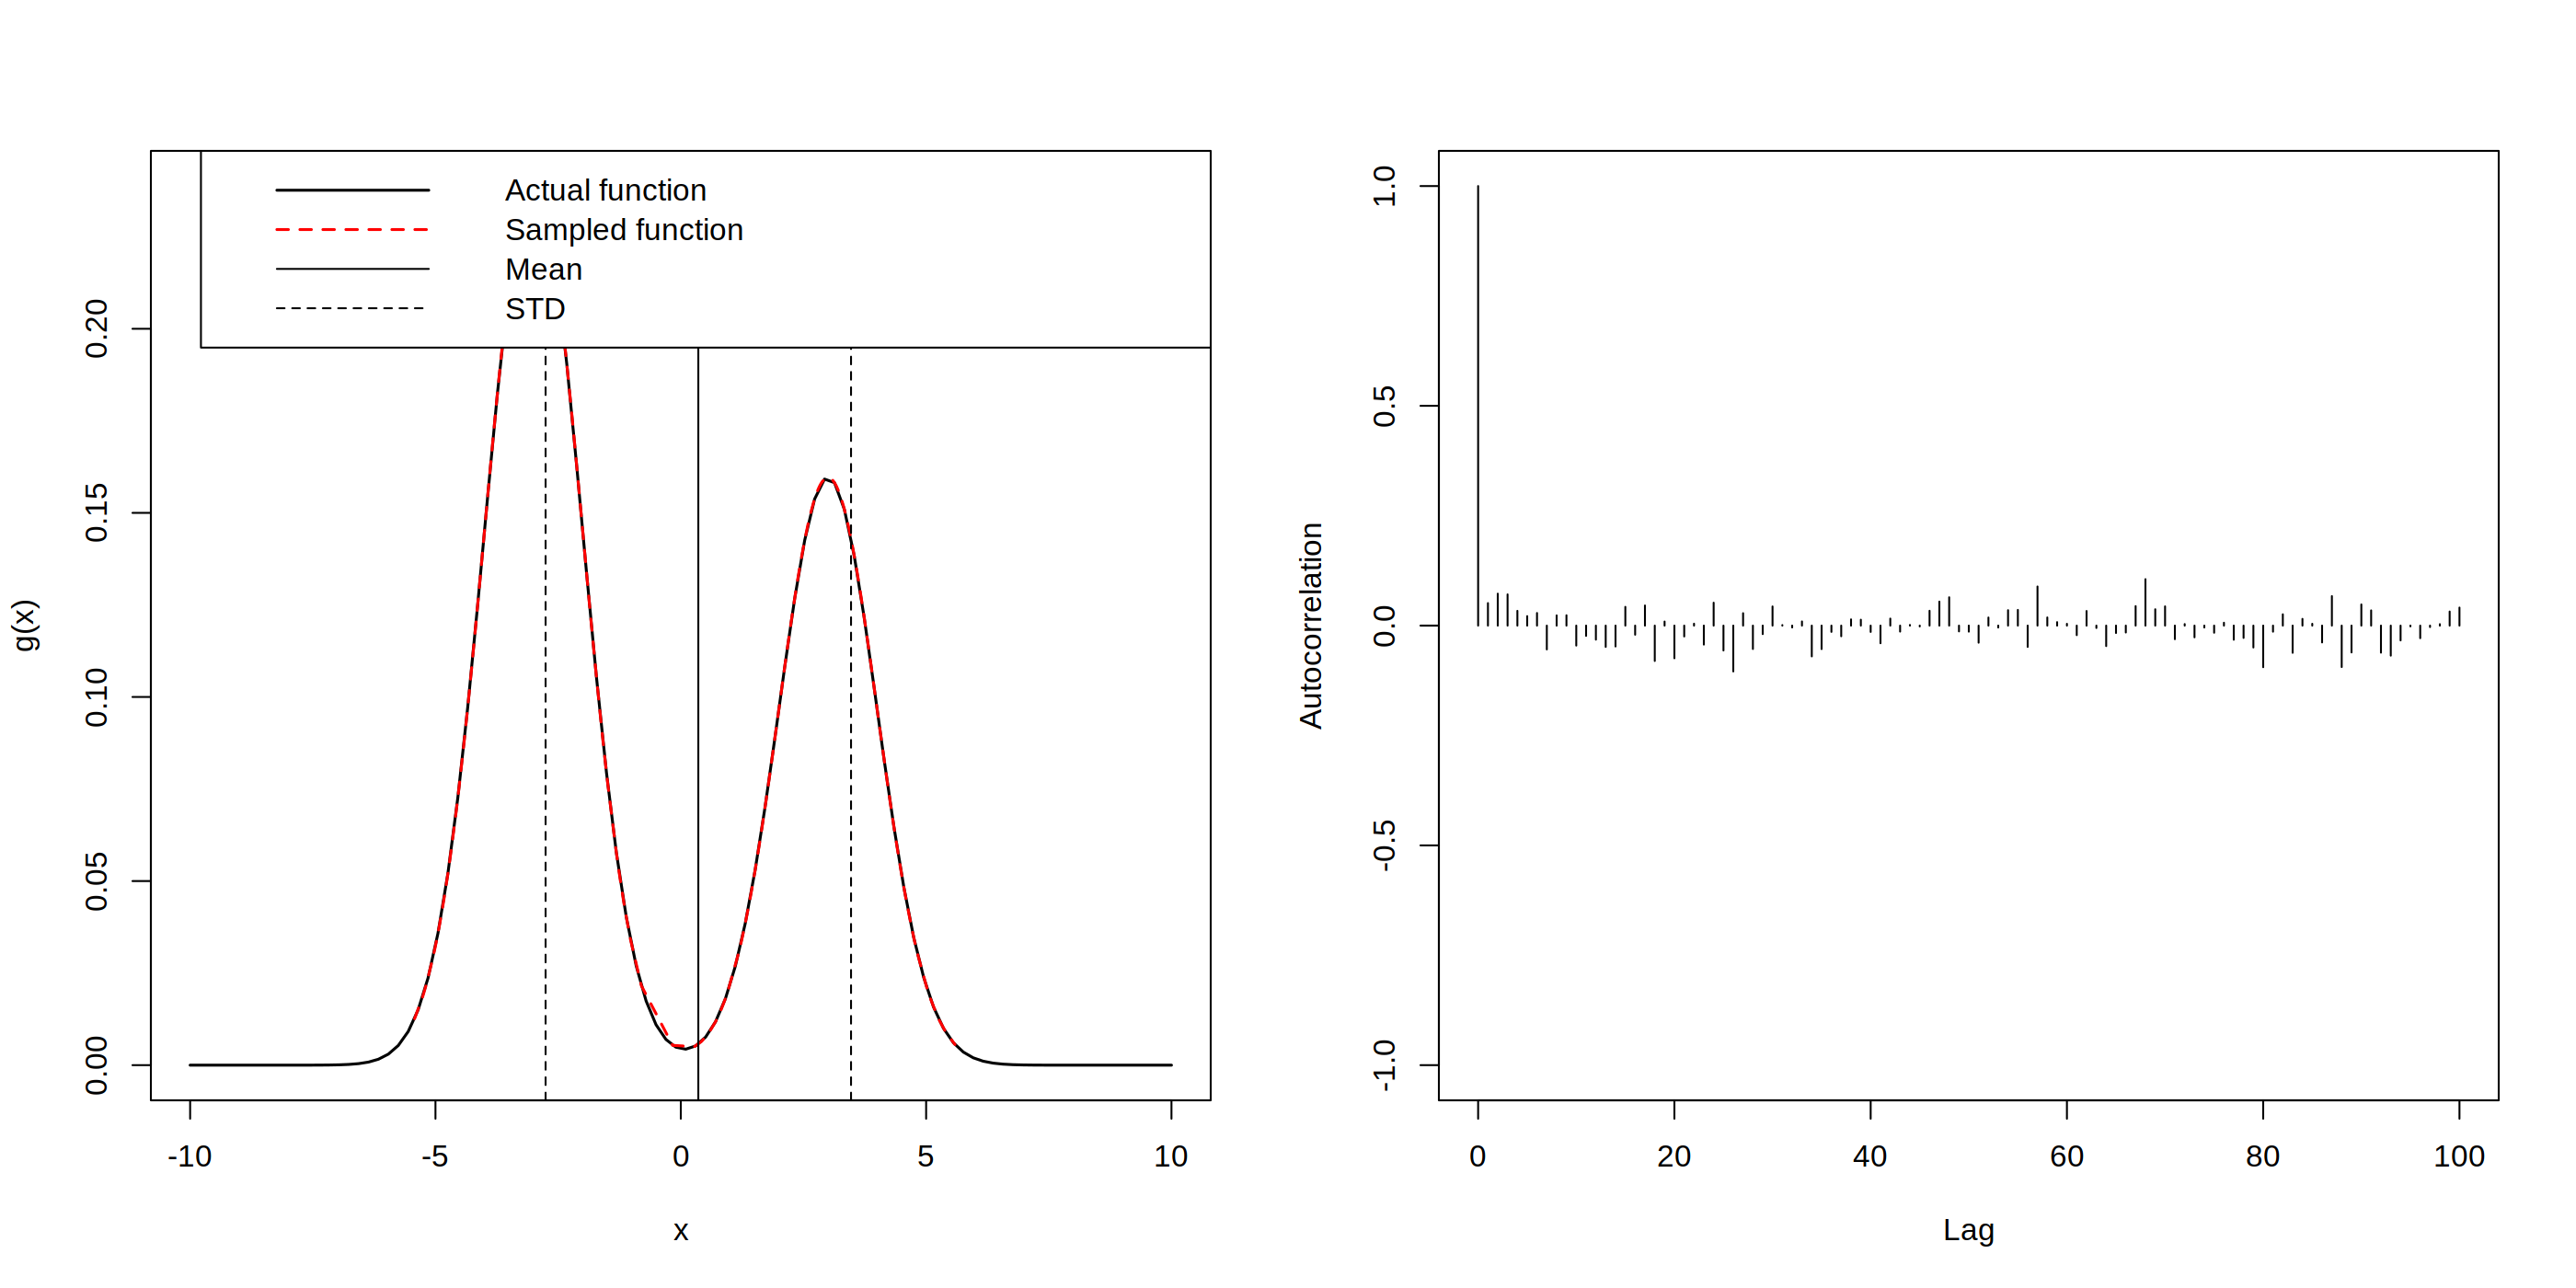


Burn-in: 19 
Thinning: 94 
Mean: 0.01410379 
Var: 9.008237

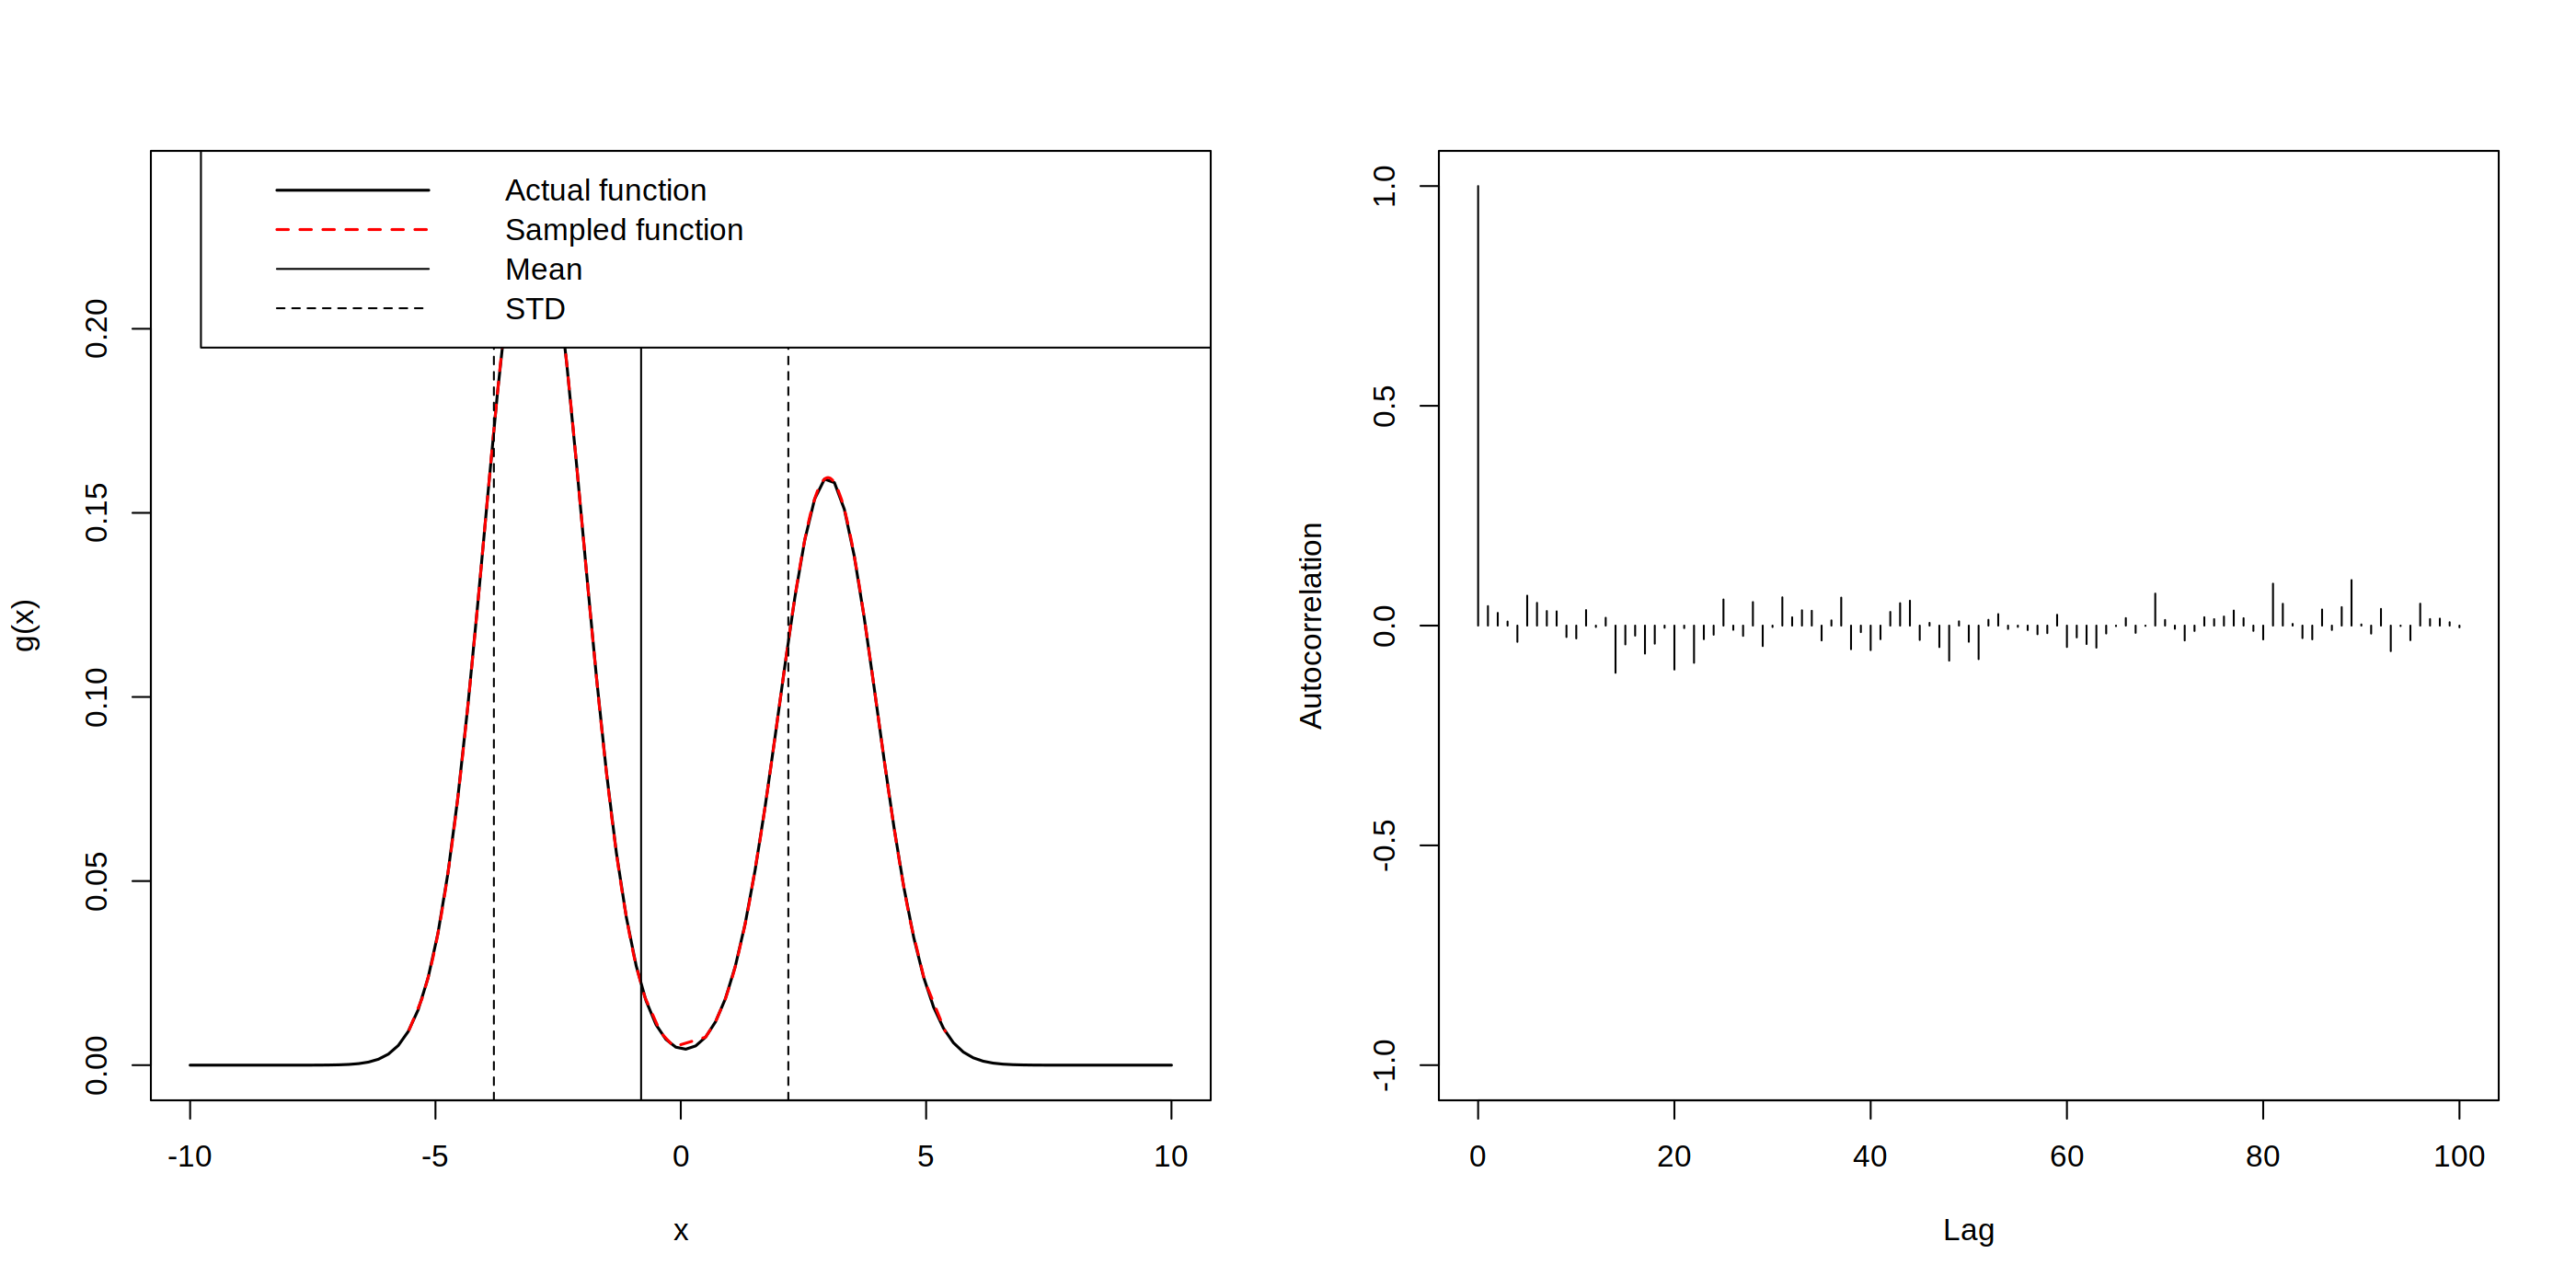


Burn-in: 93 
Thinning: 54 
Mean: -1.876529 
Var: 7.237042

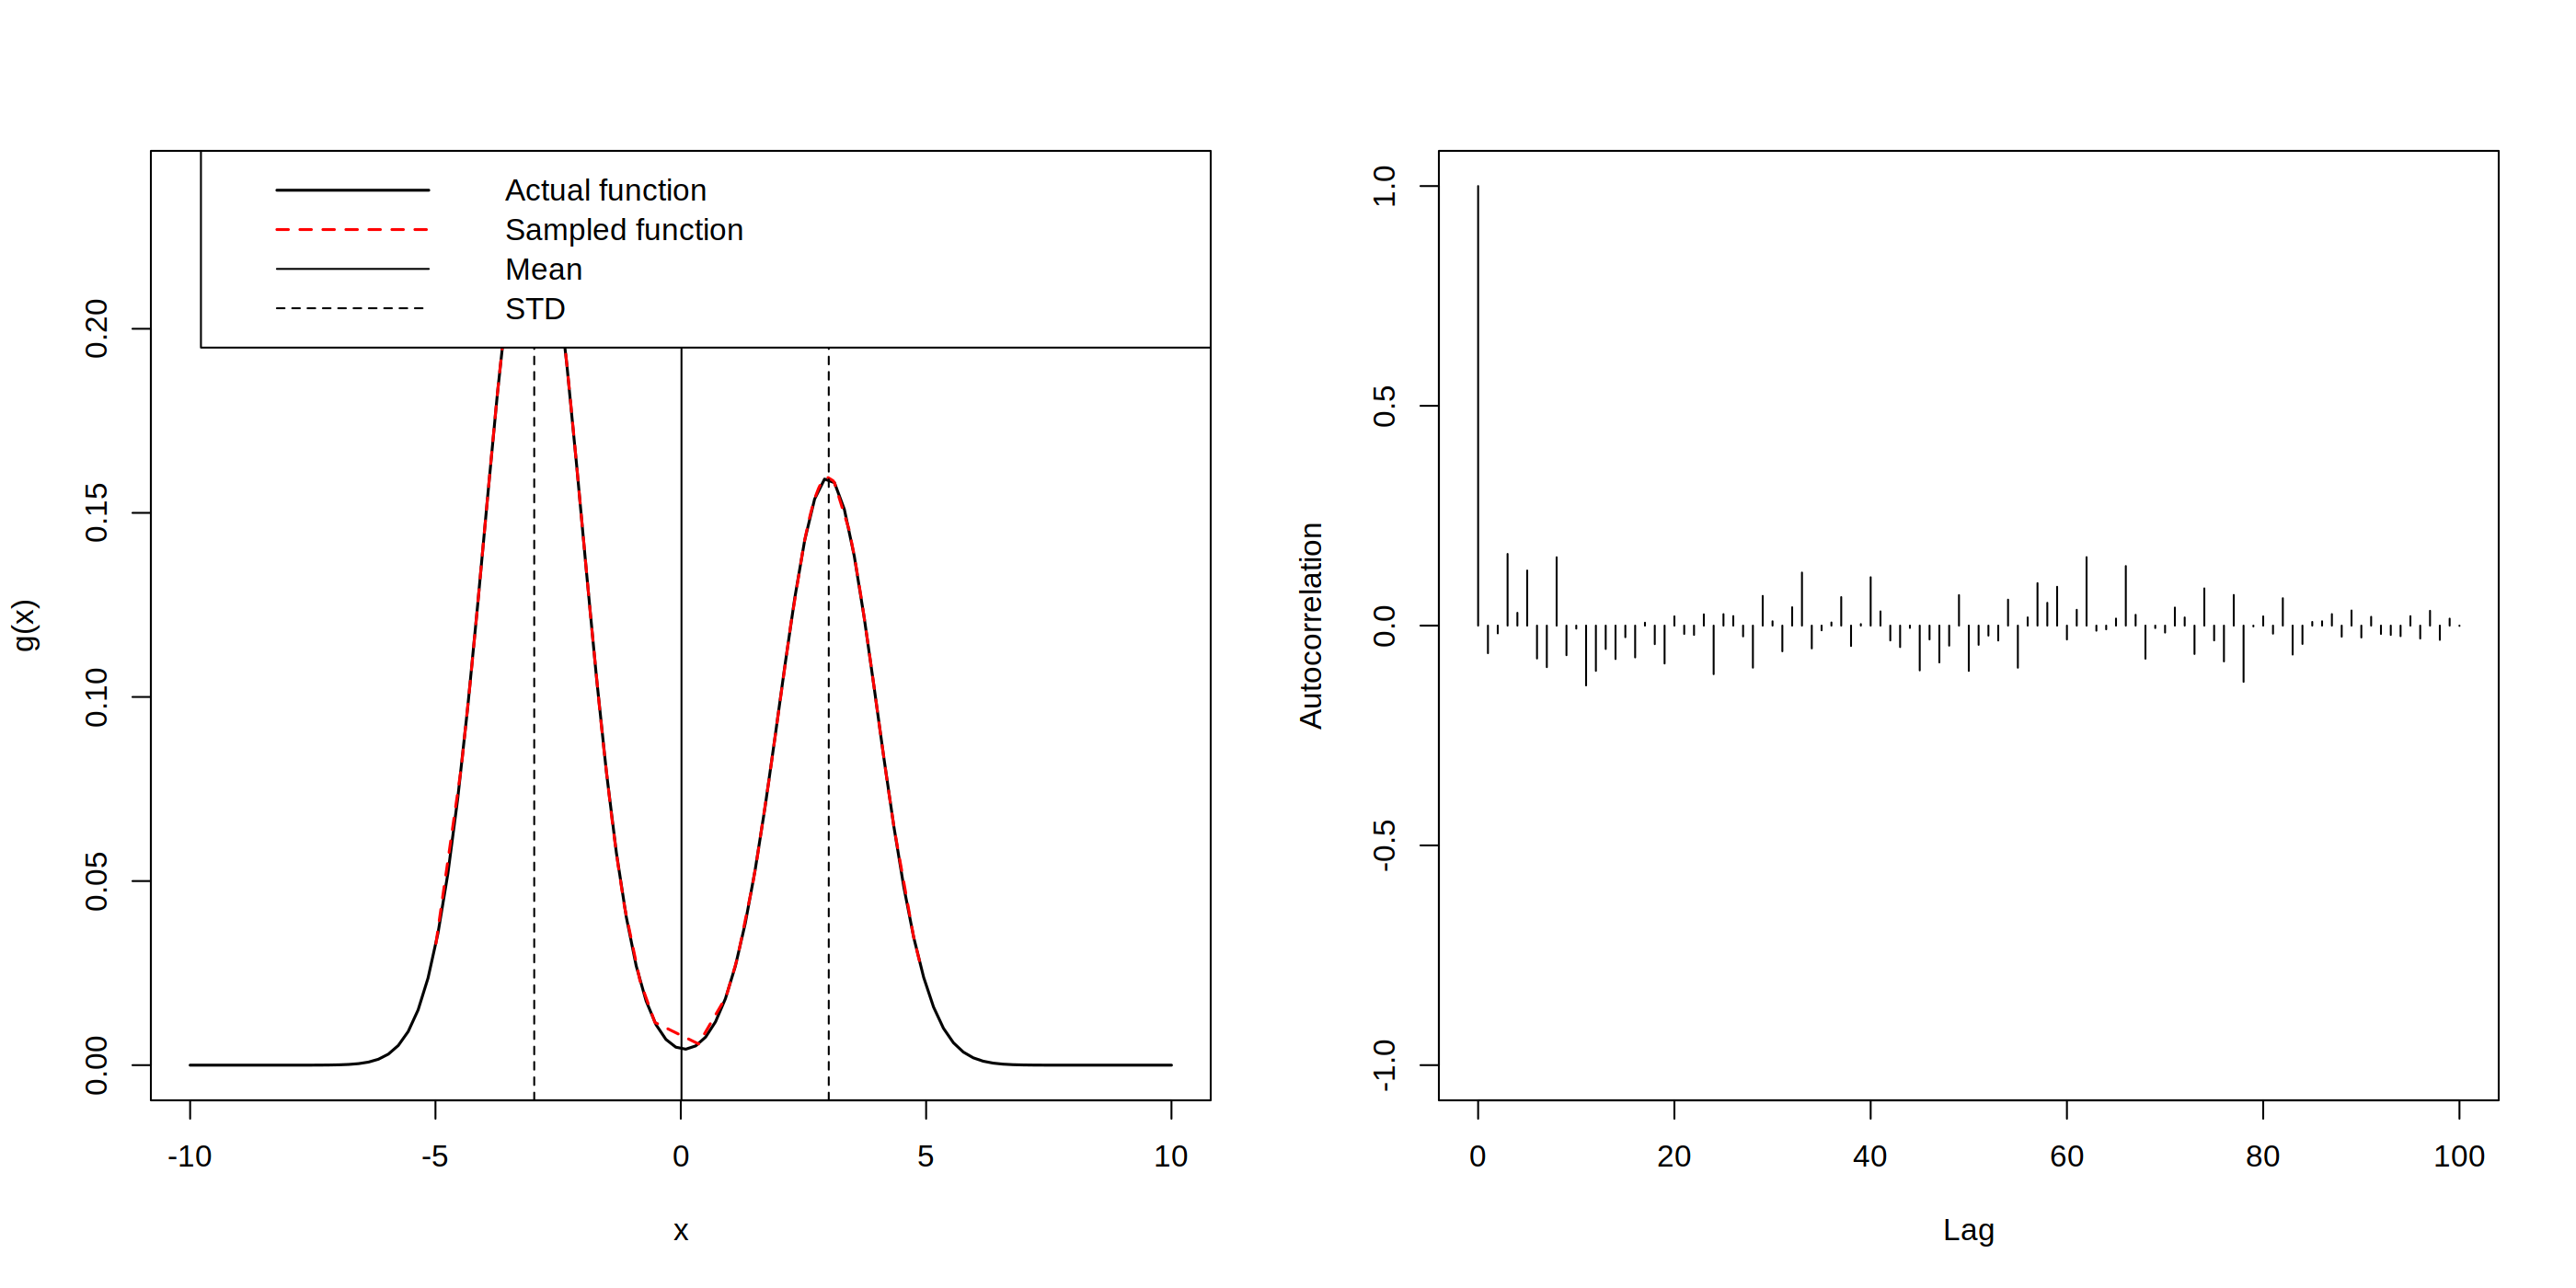


Burn-in: 43 
Thinning: 48 
Mean: -0.7601022 
Var: 9.398705

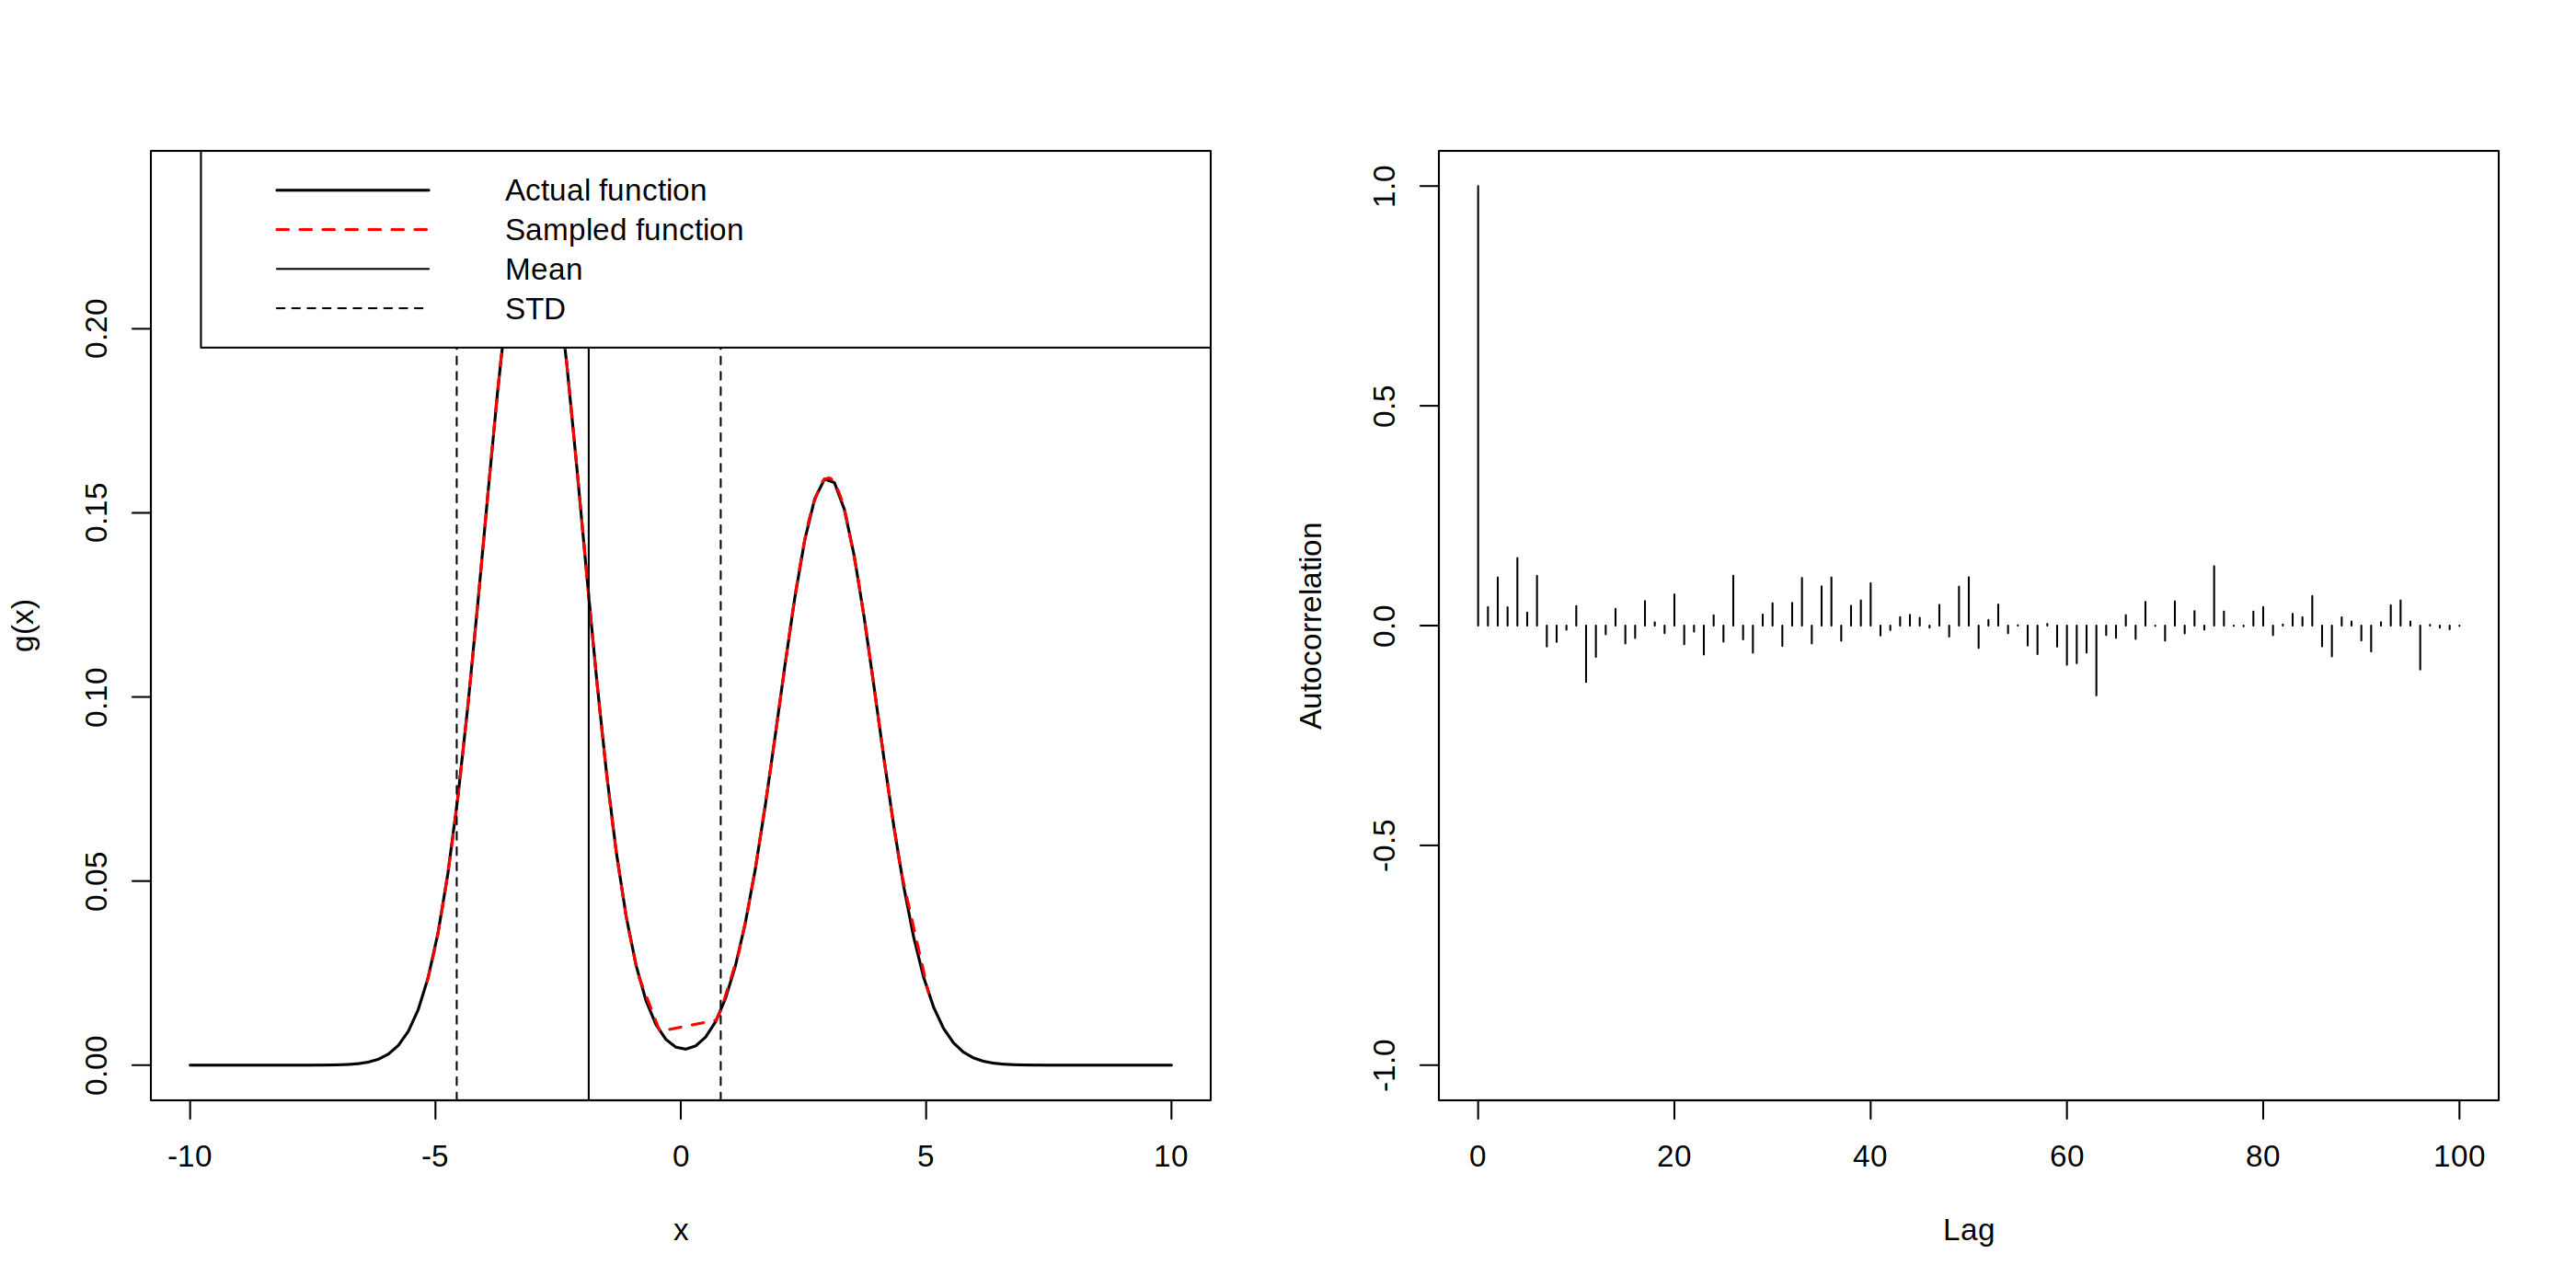


Burn-in: 26 
Thinning: 95 
Mean: -0.8292168 
Var: 8.848987

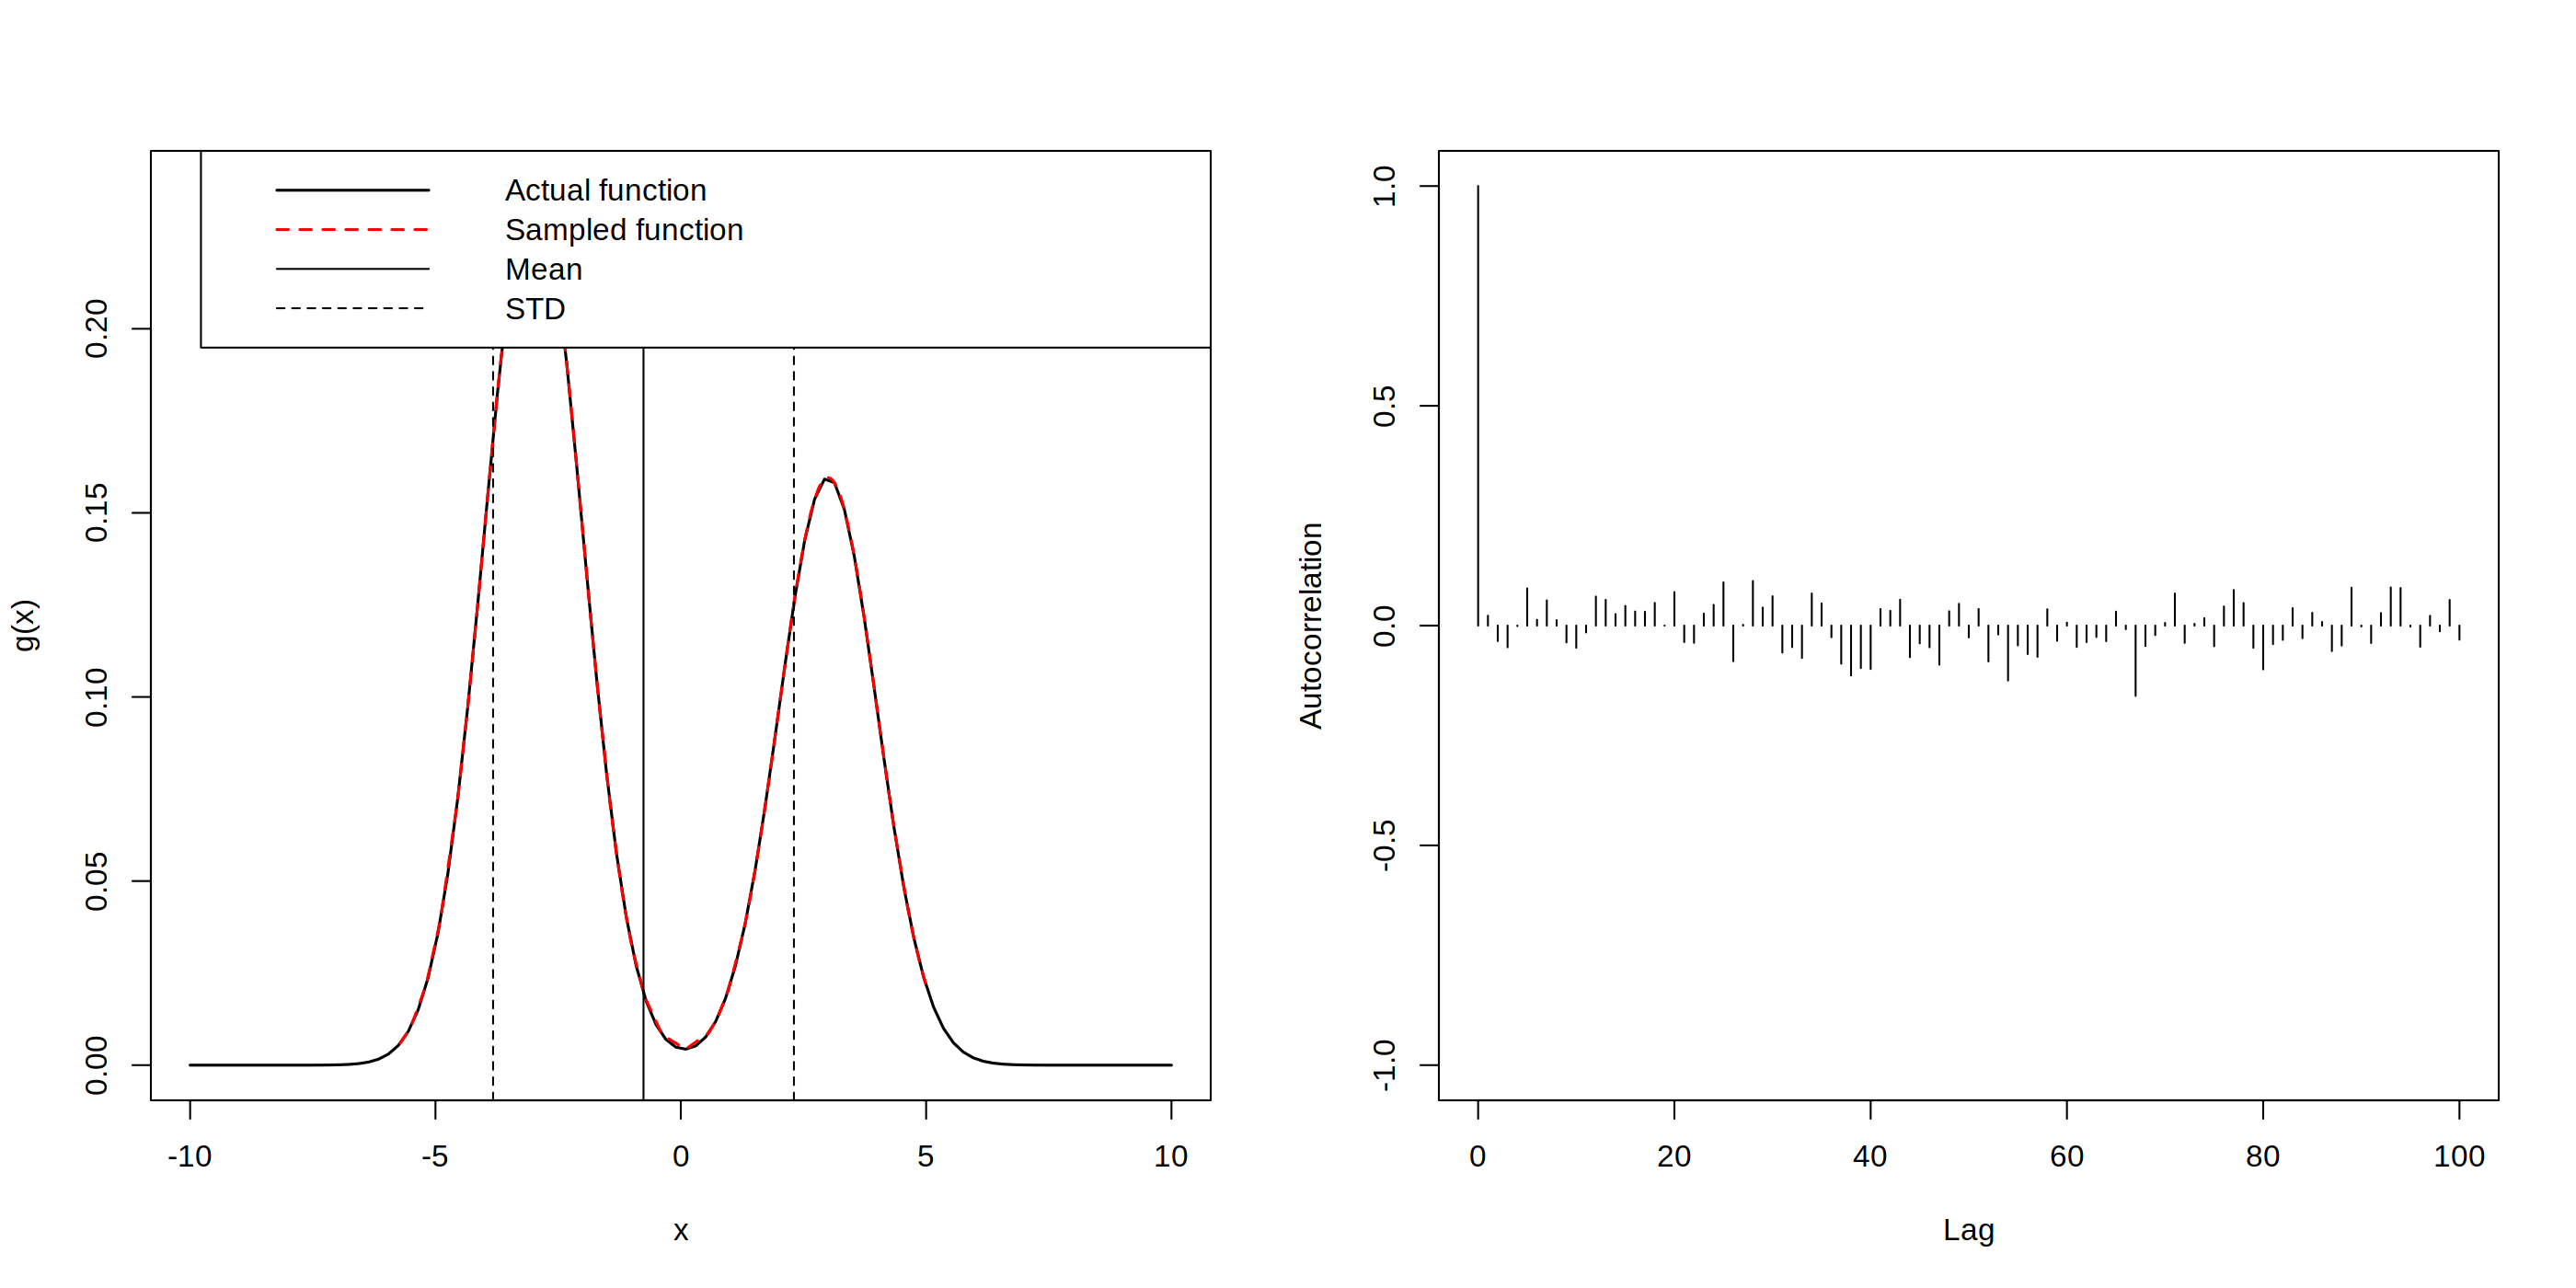


Burn-in: 92 
Thinning: 63 
Mean: -1.043511 
Var: 8.596456

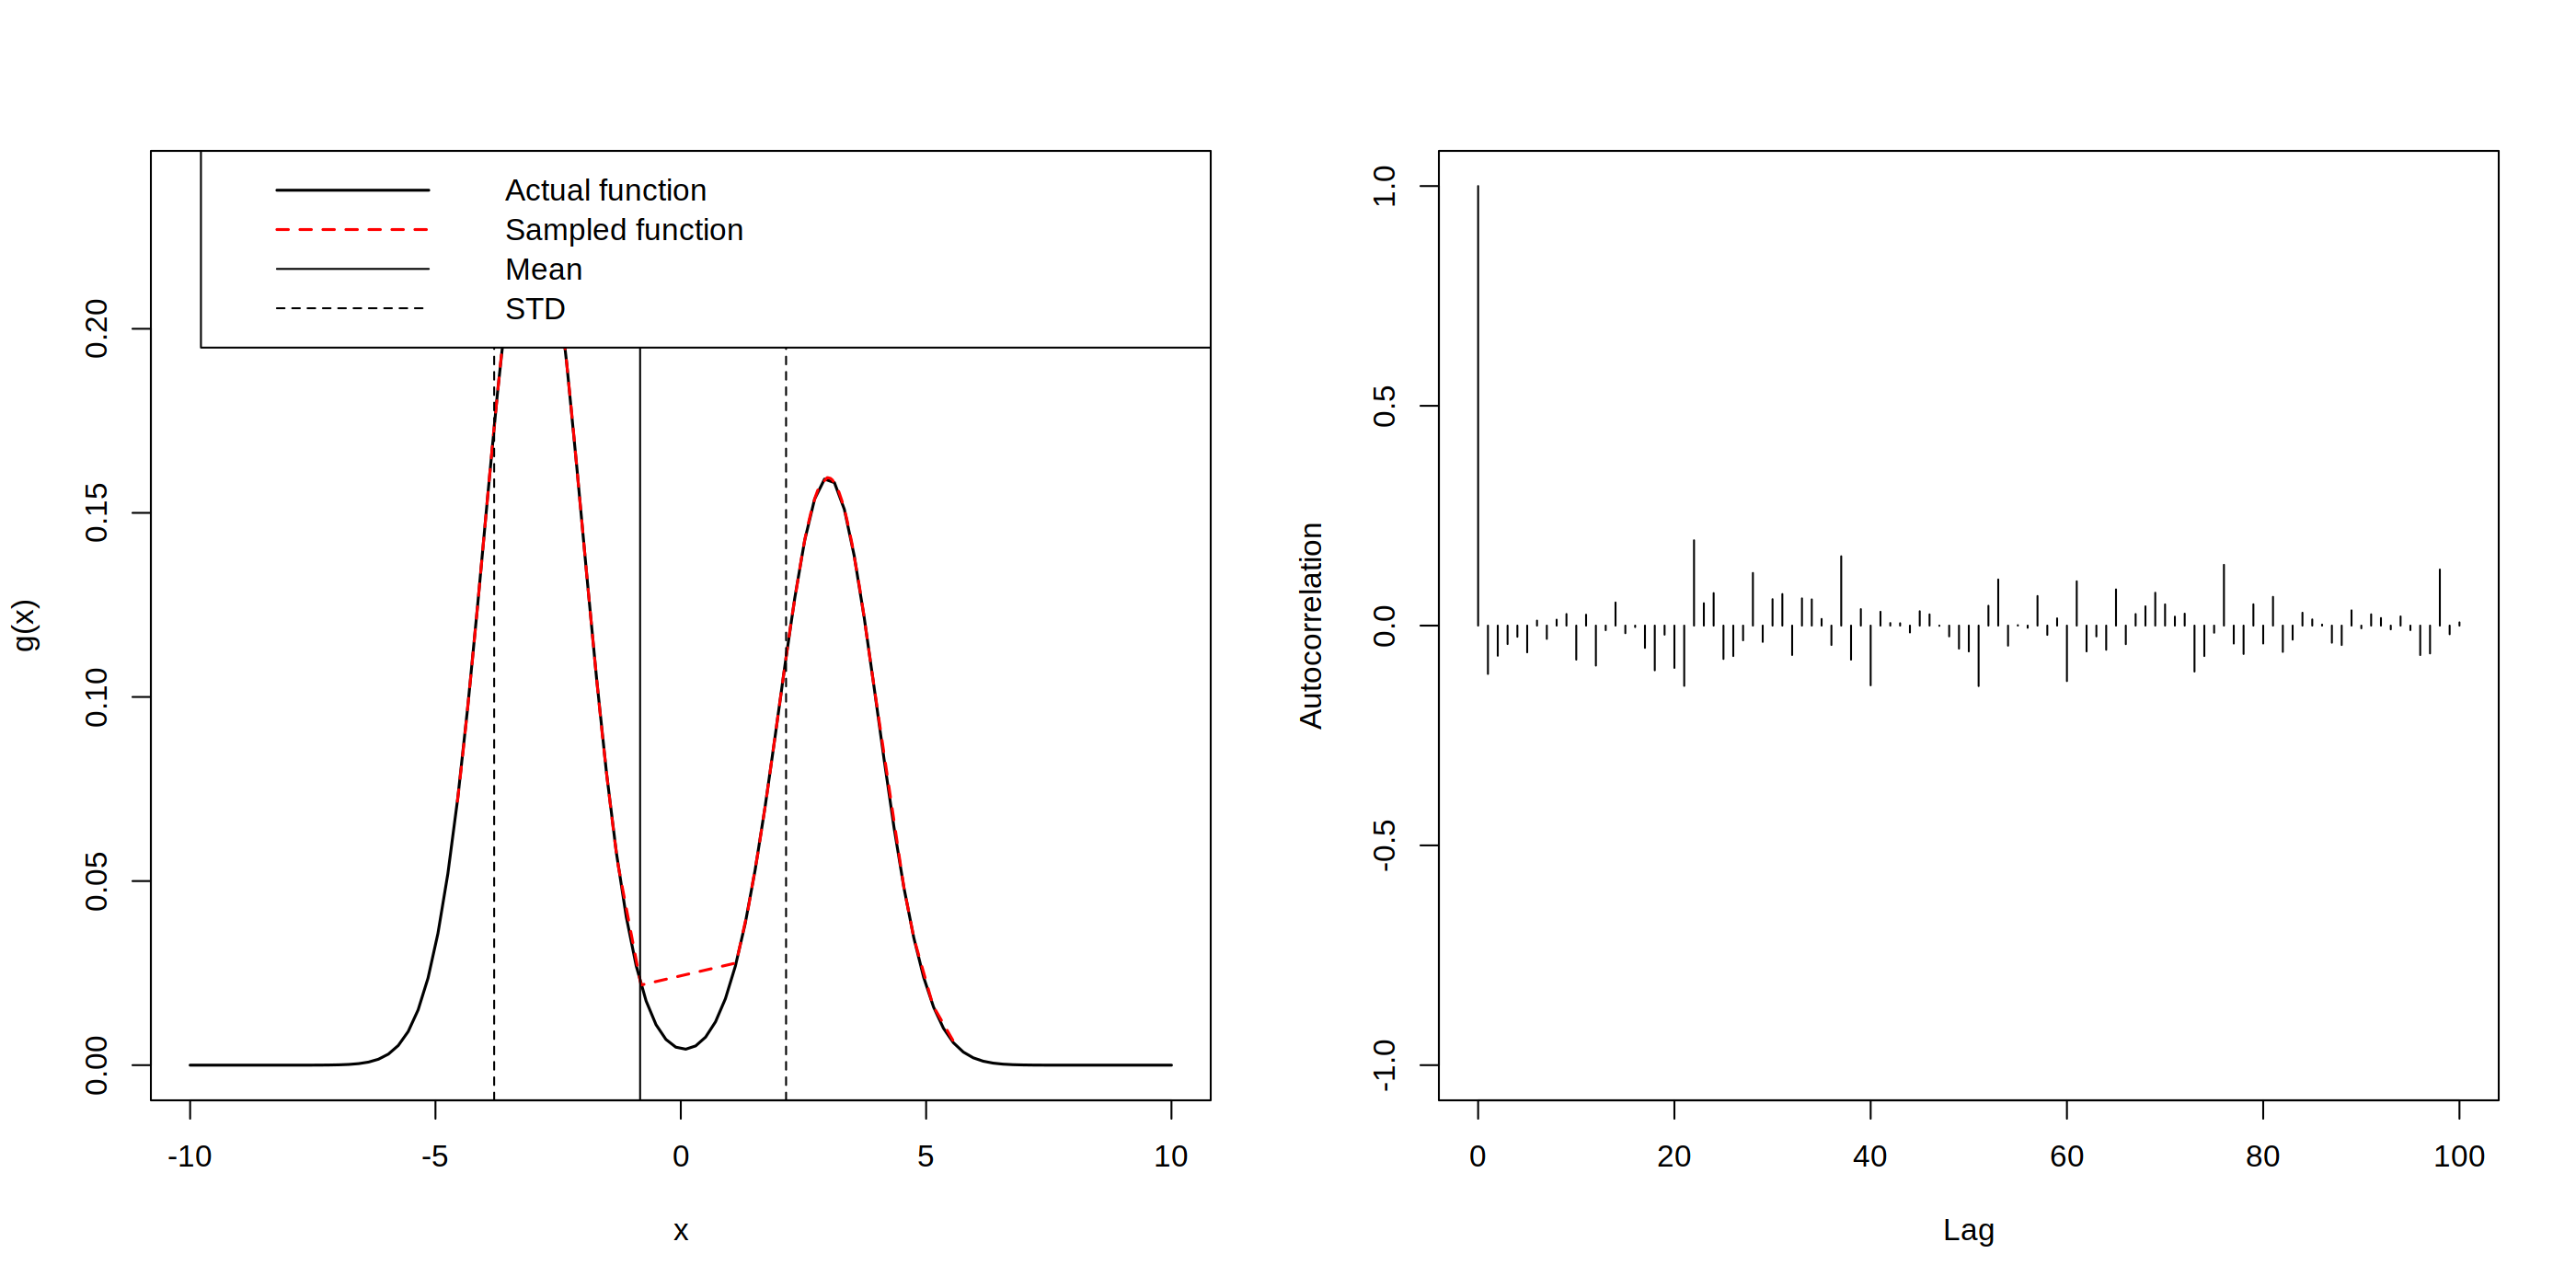

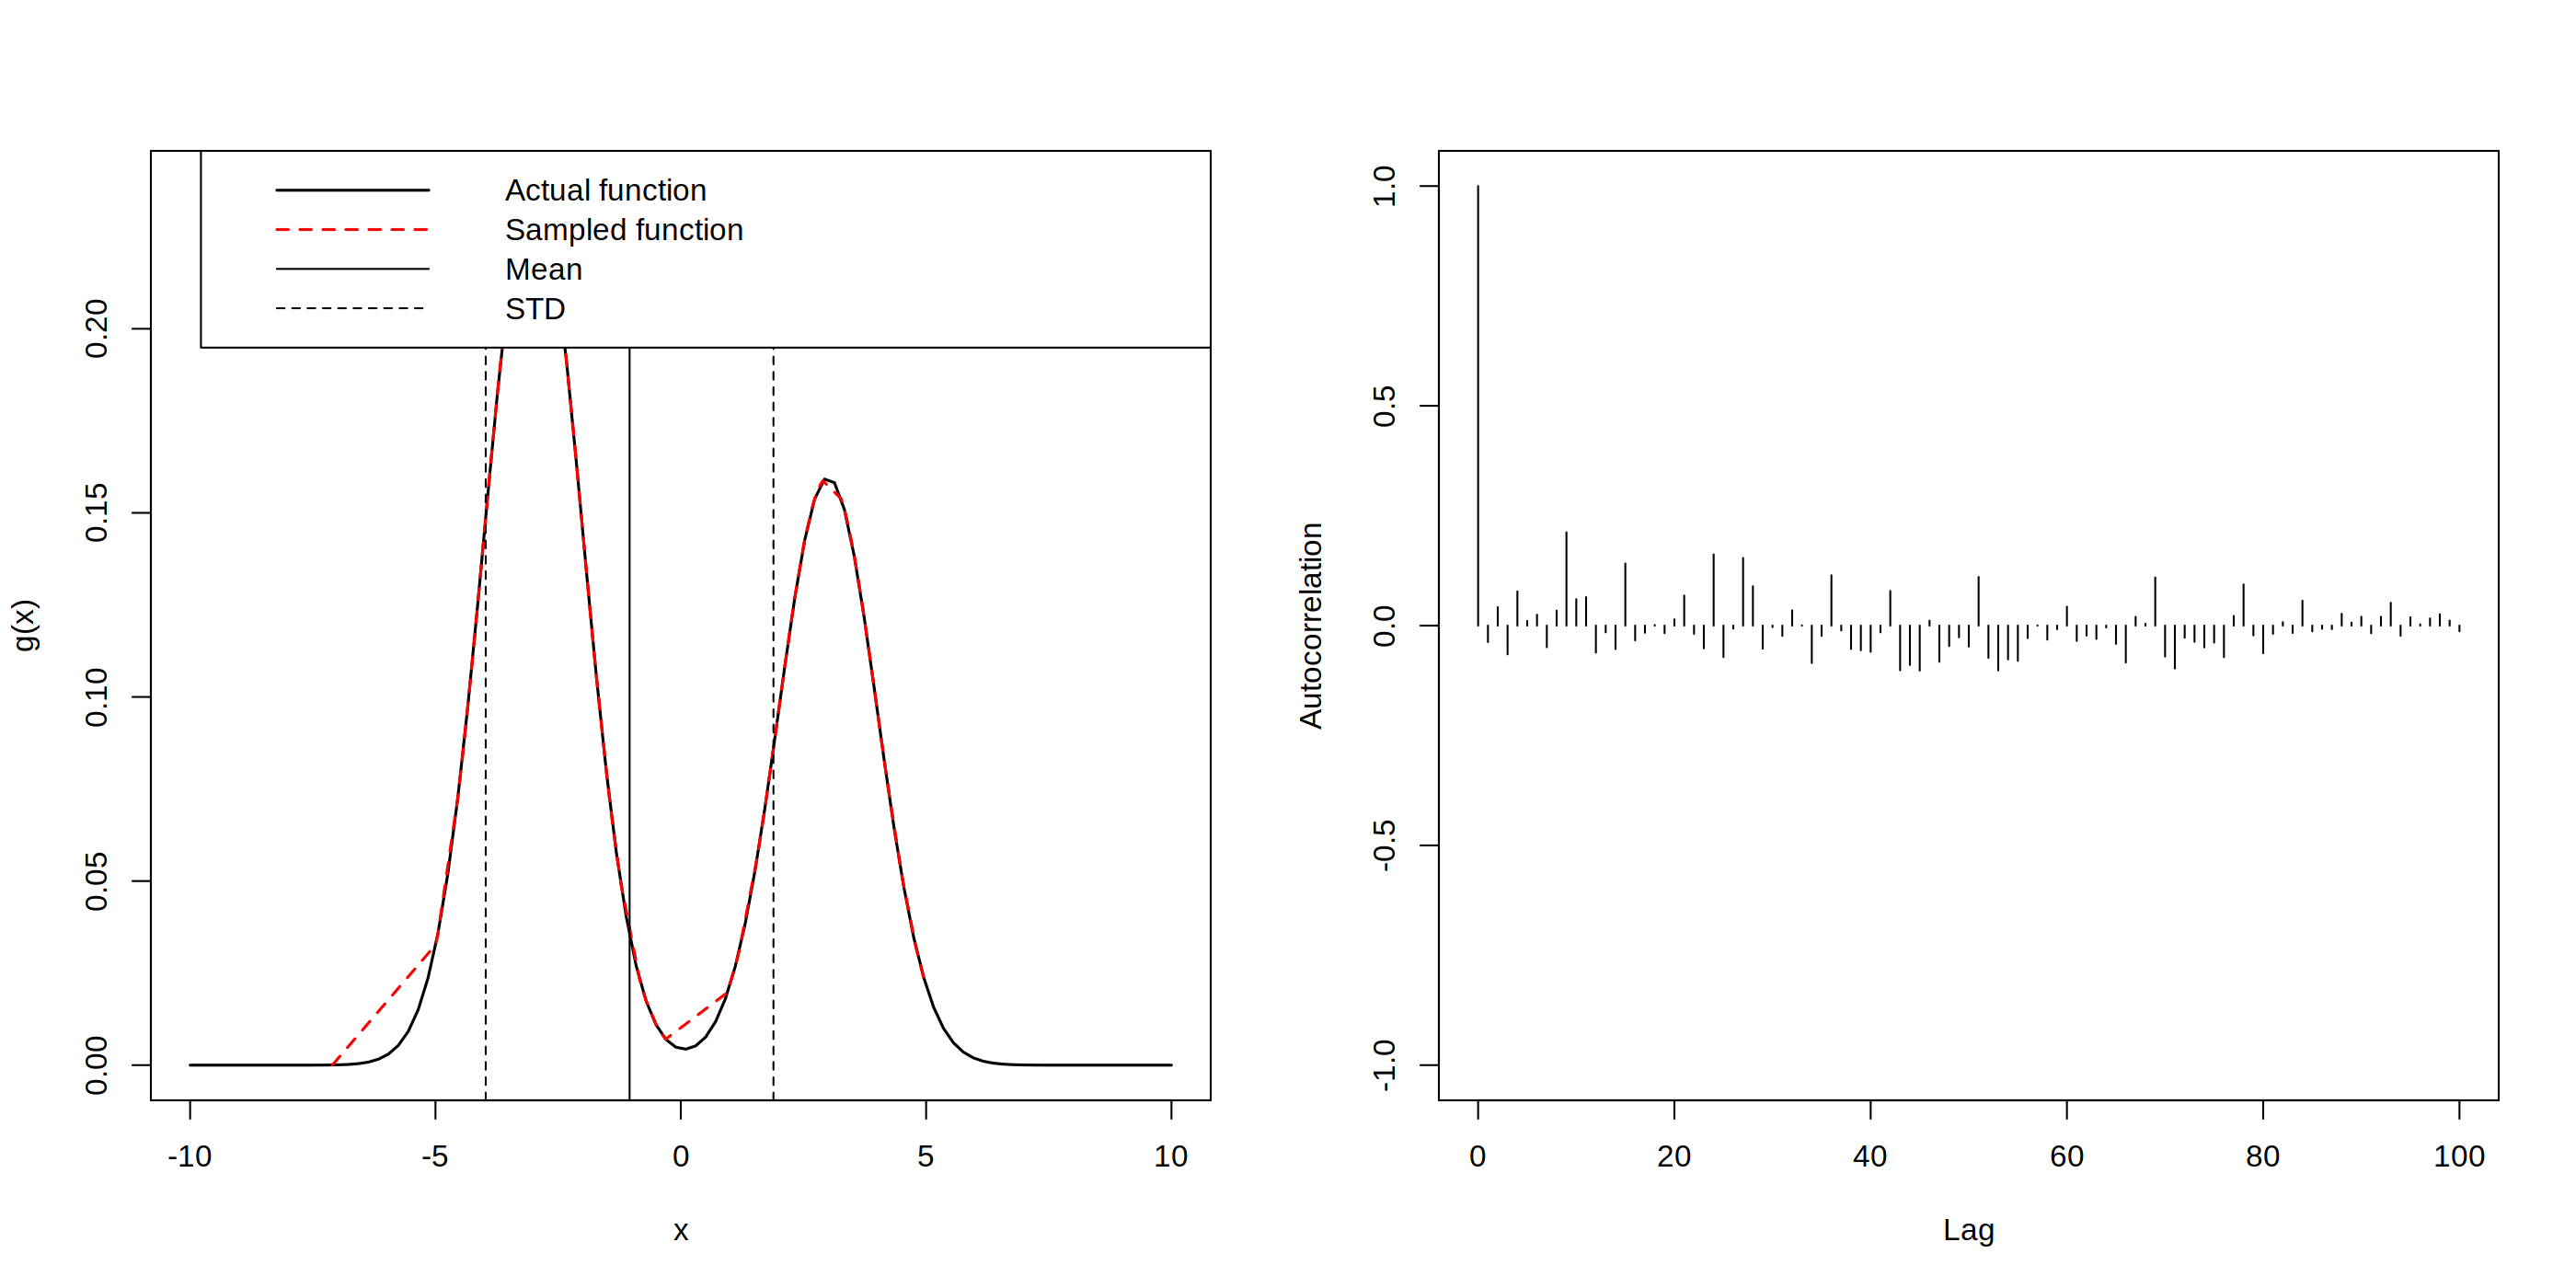

In [4]:
burn <- sample.int(100, 15)
thin <- sample.int(100, 15)
res1 <- ex1.plot(0,1)
for (i in 1:length(burn)) {res <- ex1.plot(burn[i], thin[i])}

# Exercise 2

In [5]:
library(rjags)

Warning message:
“il pacchetto ‘rjags’ è stato creato con R versione 4.3.3”
Linked to JAGS 4.3.2

Loaded modules: basemod,bugs



In [6]:
data <- list(X=c(13.427,8.588,10.908,11.582,11.011,9.735,13.779,9.763))
jm <- jags.model('ex2.bug', data)
update(jm, 1000)
chain <- coda.samples(jm, c('s2', 'ms', 'm'), n.iter=1e4)
print(summary(chain))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 8
   Unobserved stochastic nodes: 2
   Total graph size: 20

Initializing model


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean     SD Naive SE Time-series SE
m  11.109 0.8159 0.008159        0.01118
ms  5.520 1.6234 0.016234        0.02639
s2  5.398 4.3027 0.043027        0.08593

2. Quantiles for each variable:

    2.5%    25%    50%    75%  97.5%
m  9.470 10.612 11.095 11.599 12.765
ms 2.657  4.354  5.424  6.581  8.908
s2 1.567  2.892  4.198  6.431 16.328



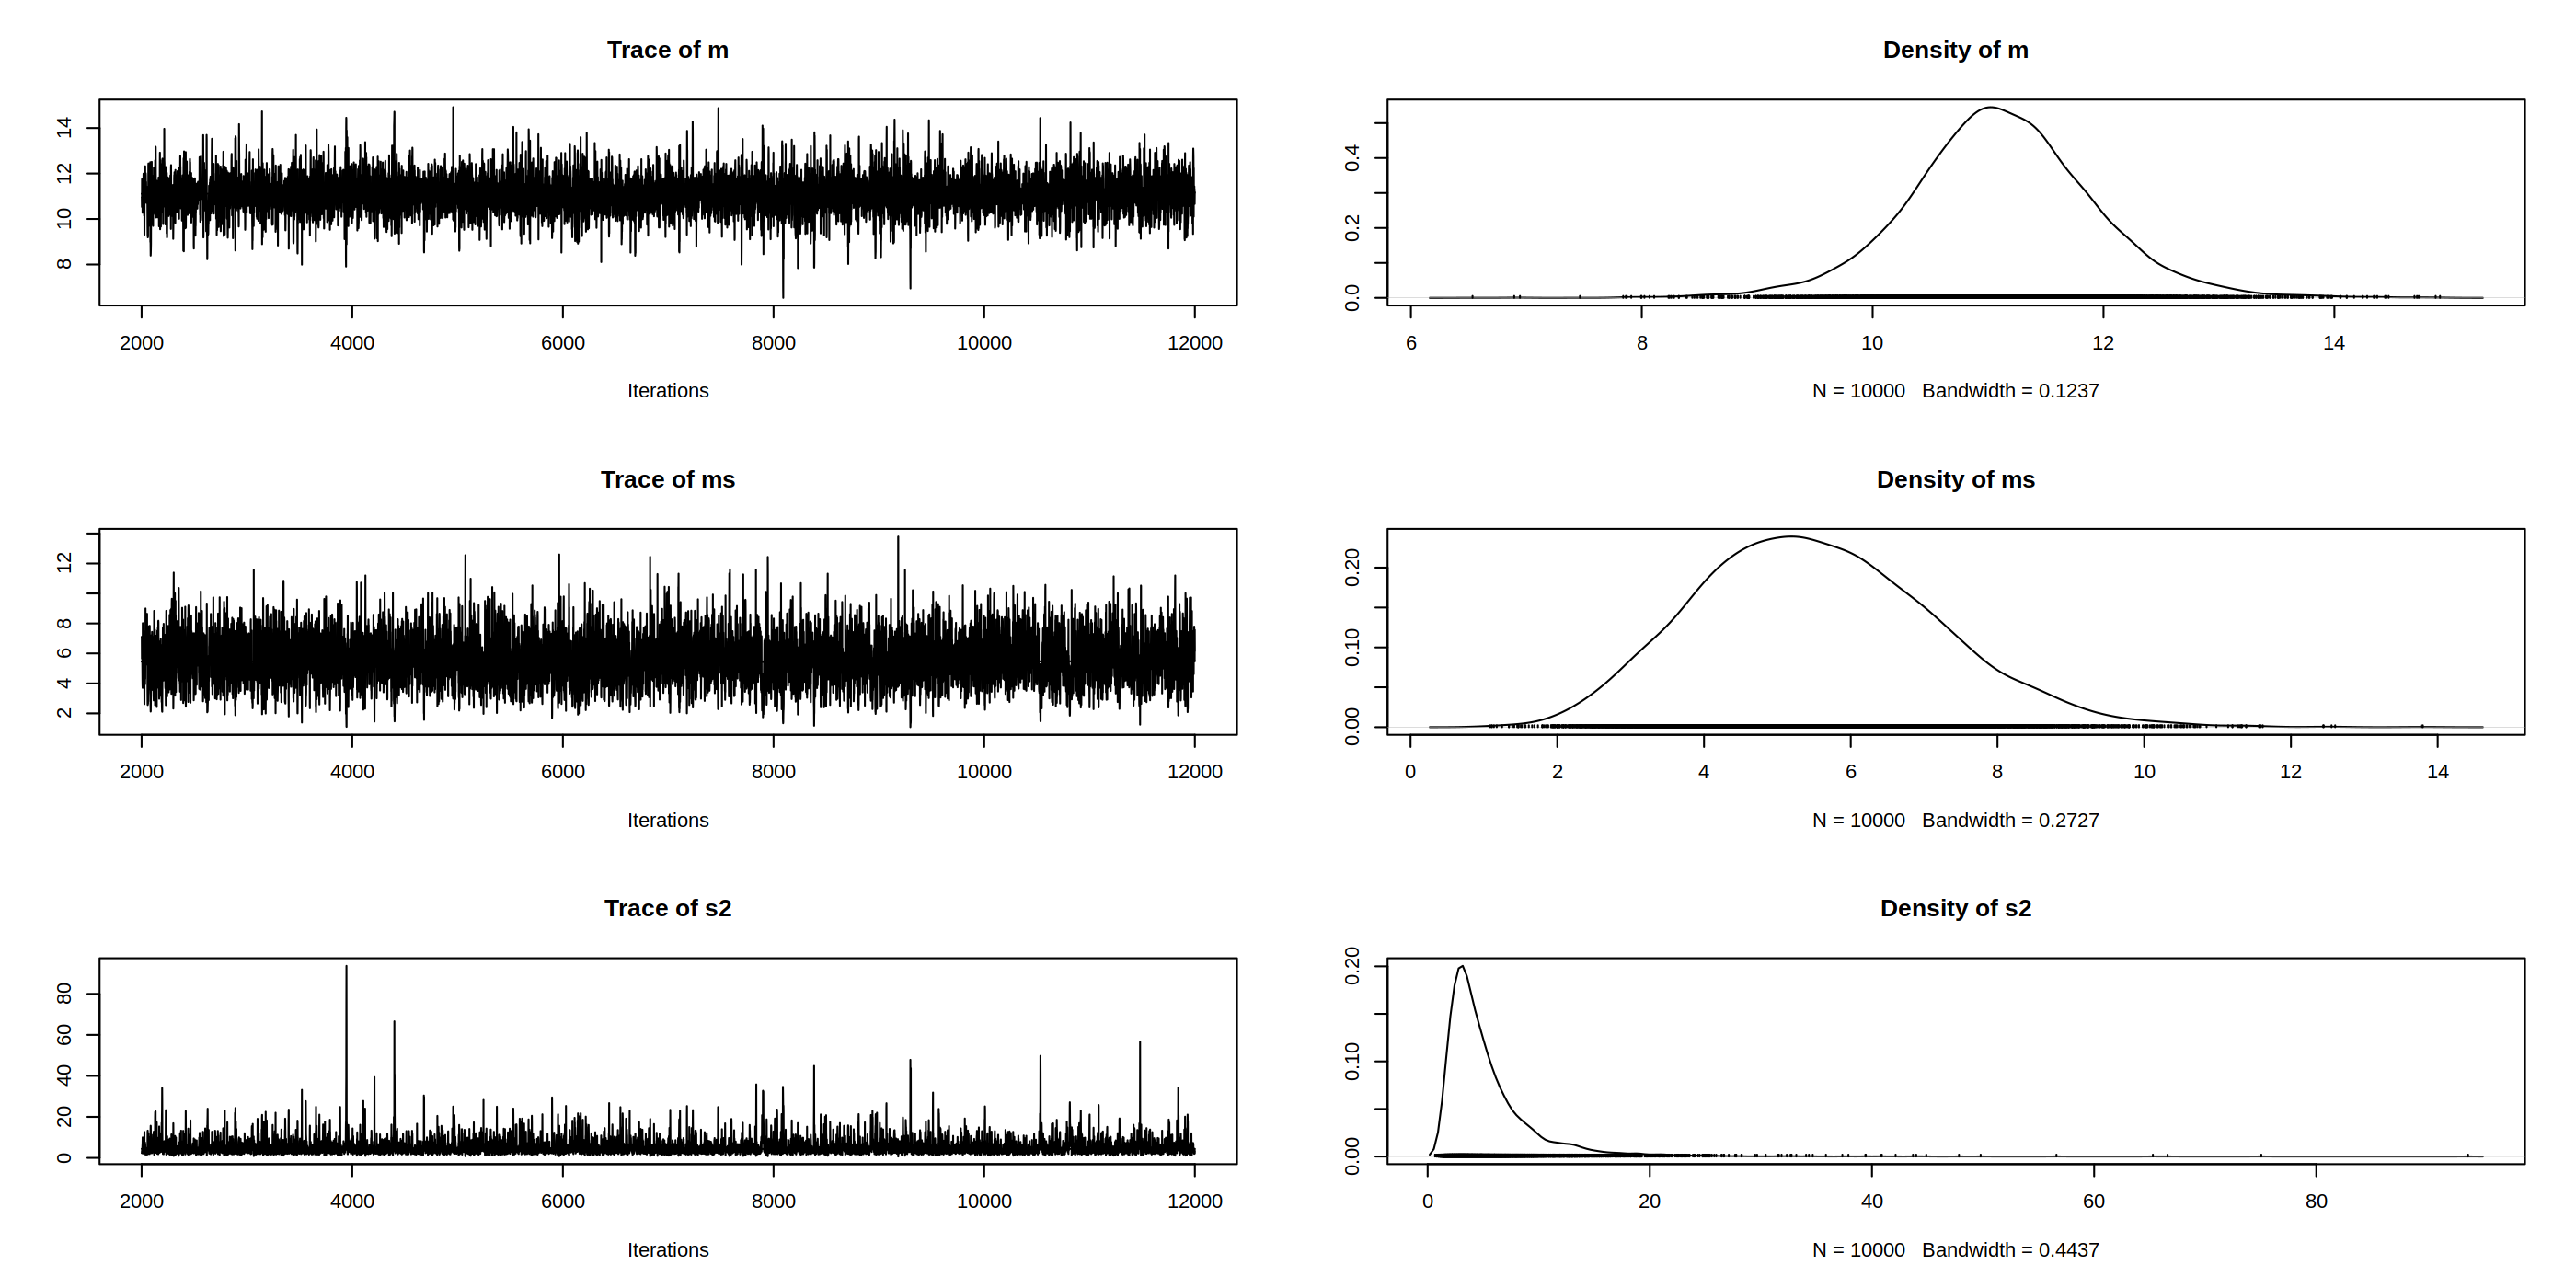

In [7]:
plot(chain)

# Exercise 3


Mean: 18.86459

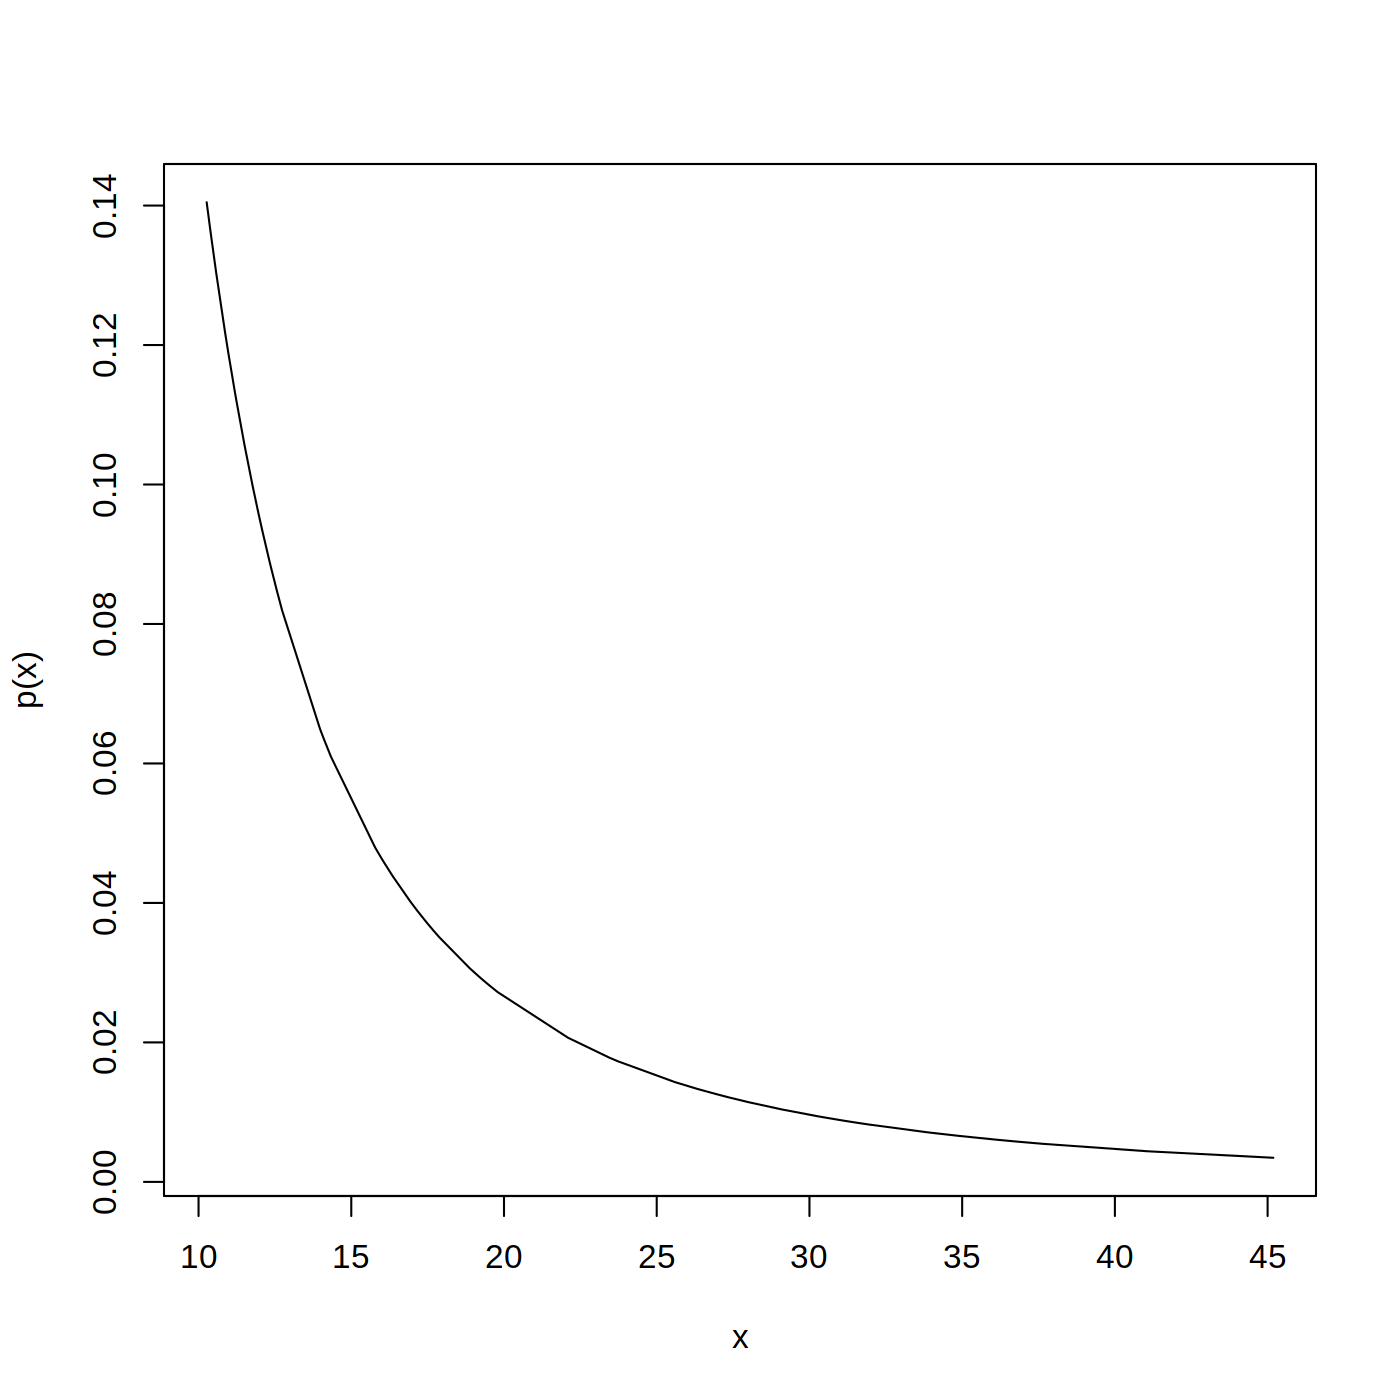

In [8]:
distro <- function(x, a=2.5, x.min=10) {ifelse(x >= x.min, (a - 1) / x.min * (x / x.min)^(-a), 1e-35)}

log.distro <- function(x, a=2.5, x.min=10) {log10(distro(x, a, x.min))}

mat.pow <- metro(log.distro, 1, 6, 1e2)
mat.pow <- mat.pow[mat.pow[,2] != -35,]
pow.plot <- mat.pow[order(mat.pow[,1]),]

pow.m <- mean(mat.pow[,1])

cat('\nMean:', pow.m)

options(repr.plot.height=7, repr.plot.width=7, repr.plot.res=200)
plot(pow.plot[,1], 10 ^ pow.plot[,2], t='l', xlab='x', ylab='p(x)')


freq: 2.836317

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 98
   Unobserved stochastic nodes: 1
   Total graph size: 525

Initializing model


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      2.860934       0.192404       0.001924       0.002439 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
2.507 2.730 2.856 2.985 3.260 



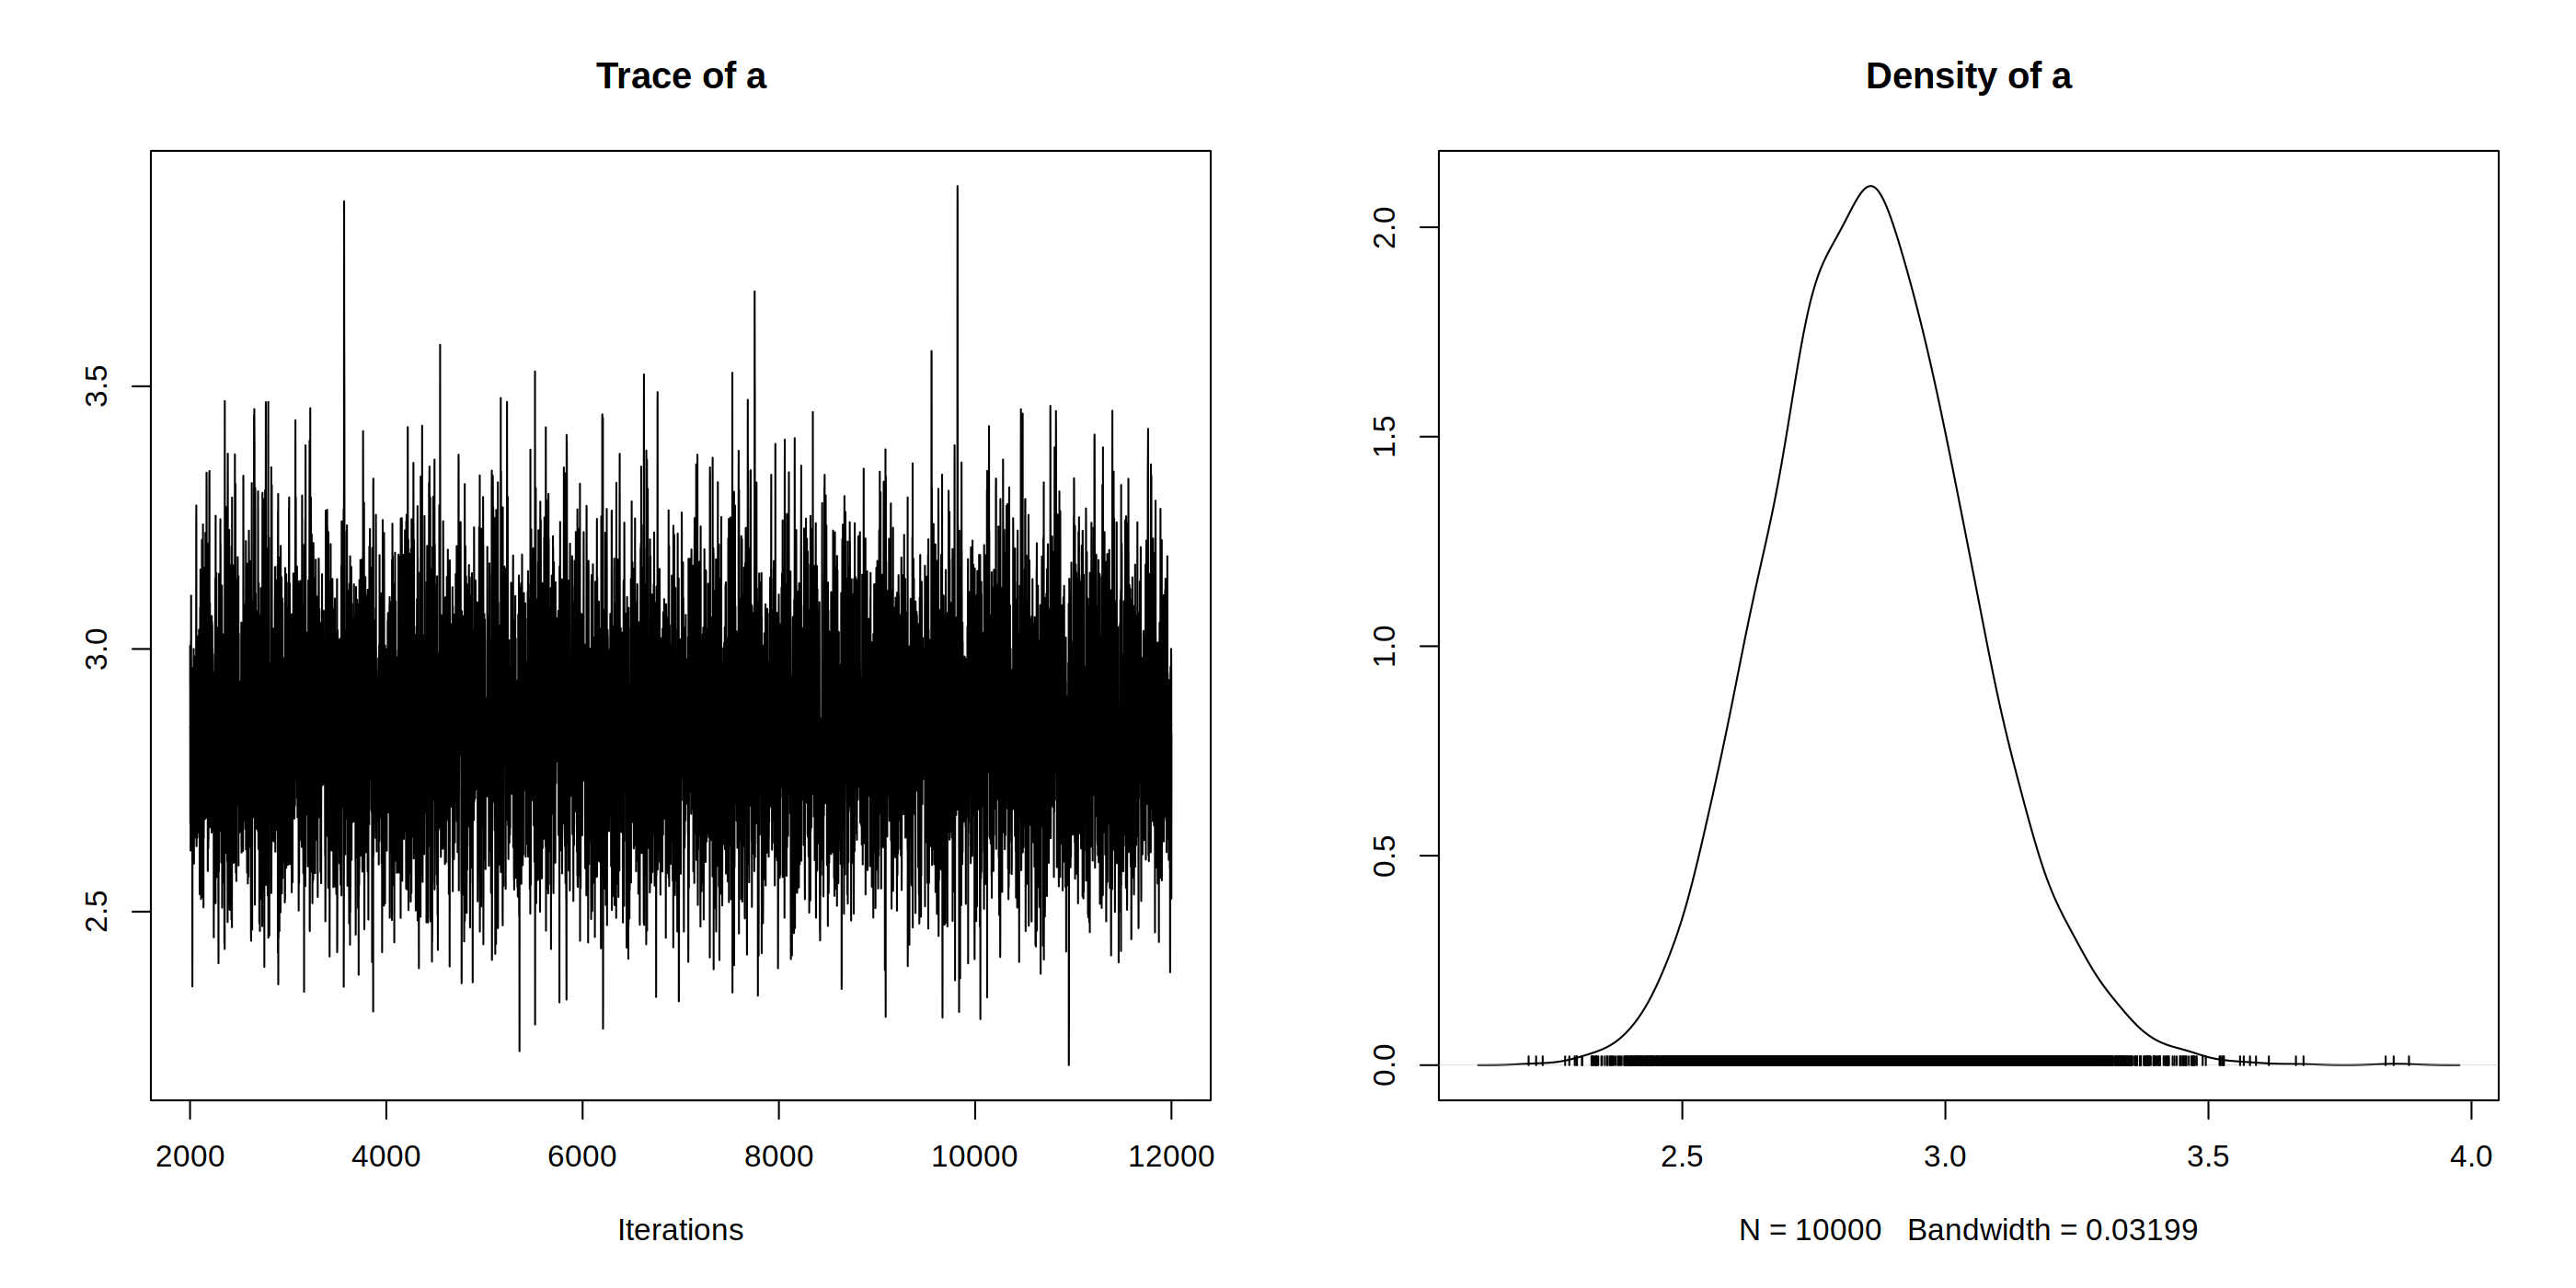

In [14]:
gen.sam <- mat.pow[,1]
f.a <- 1 + length(gen.sam) / sum(log(gen.sam / 10))
cat('freq:', f.a)

data <- list(X=gen.sam, pt=numeric(length(gen.sam)))
 
jm <- jags.model('ex3_unif.bug', data)
update(jm, 1000)
chain <- coda.samples(jm, 'a', n.iter=1e4)

print(summary(chain))
options(repr.plot.height=7, repr.plot.width=14, repr.plot.res=200)
plot(chain)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 98
   Unobserved stochastic nodes: 1
   Total graph size: 526

Initializing model


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     2.5882738      0.0850841      0.0008508      0.0011004 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
2.422 2.530 2.587 2.646 2.755 



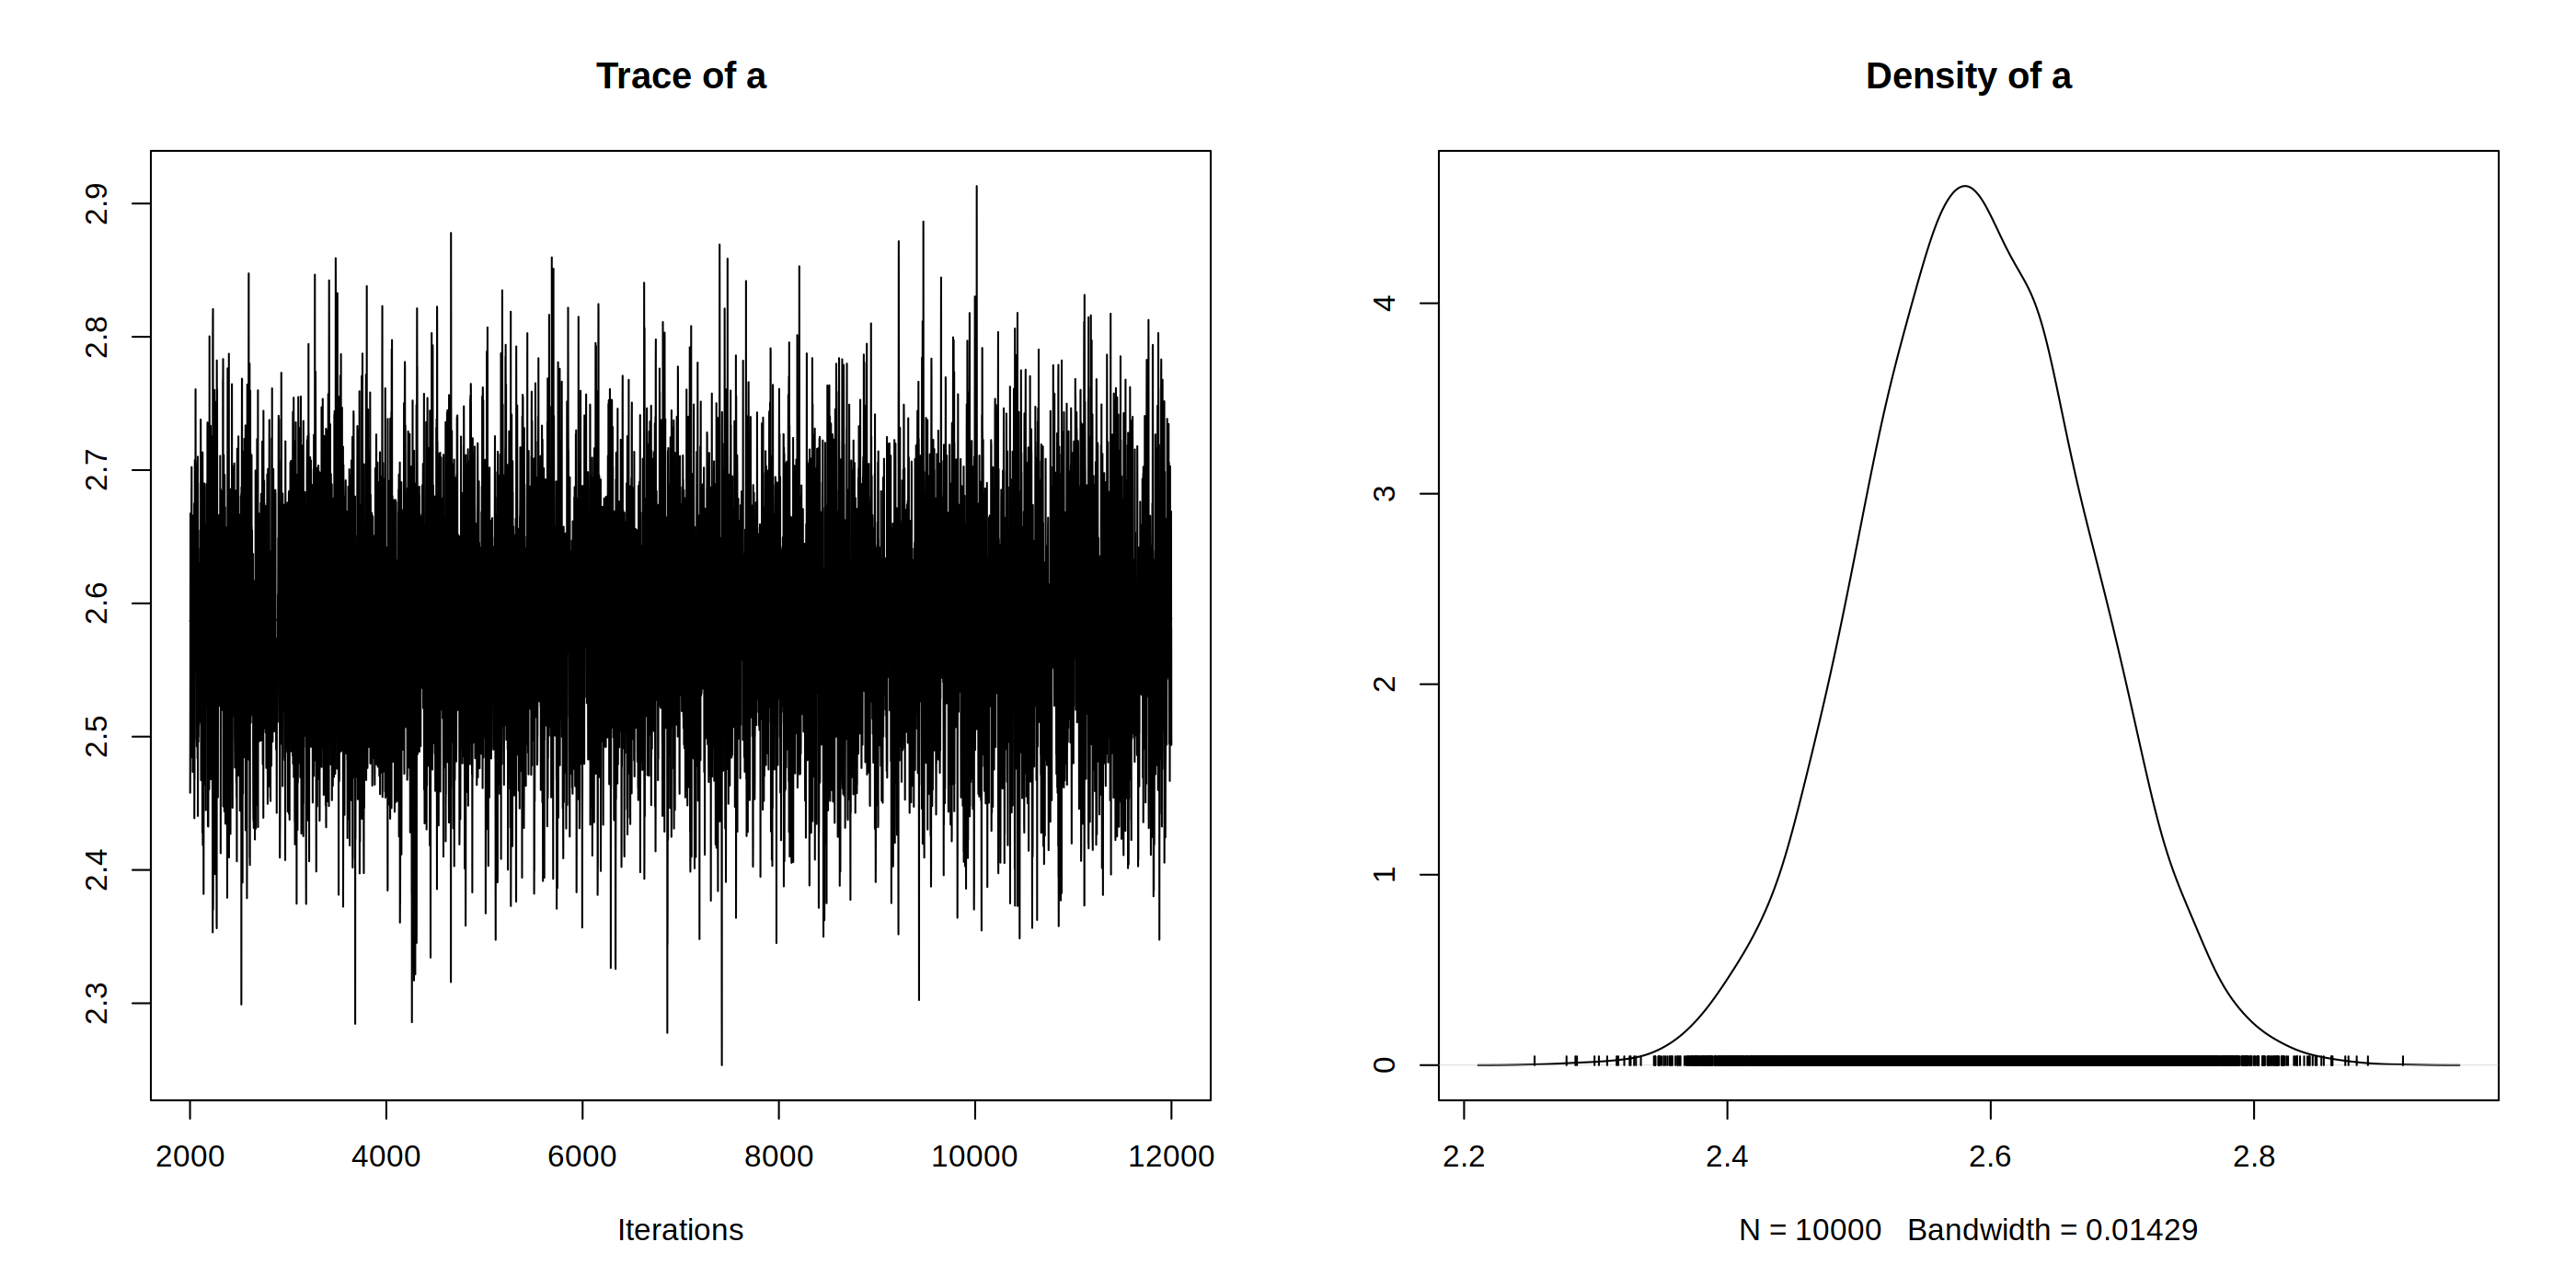

In [15]:
jm <- jags.model('ex3_norm.bug', data)
update(jm, 1000)
chain <- coda.samples(jm, 'a', n.iter=1e4)

print(summary(chain))
options(repr.plot.height=7, repr.plot.width=14, repr.plot.res=200)
plot(chain)

The norm jag model, seems to be the best estimator for a.